#Description

## Introduction
In a global view, lotteries are considered 100% random, but applying data science techniques can help us extract insights from past results and improve our chances of winning. This algorithm aims to analyze past Mega Sena lottery results and generate a new game based on statistical analysis and machine learning.

## Data Collection and Cleaning
The algorithm starts by collecting a dataset of past Mega Sena lottery results, including the winning numbers and their frequencies. The data is then cleaned and organized by frequency for each position.

## Statistical Analysis
Main statistics data such as count, mean, standard deviation, min, 25%, 50%, 75%, and max are calculated. Using the standard deviation, a new dataset is generated, and a new game is randomly selected from this dataset. This ensures that the generated numbers are not just random but within a range of past results that is statistically relevant.

## Moving Average and Machine Learning
Moving average is then applied to the past results to identify any trends or patterns in the data. A machine learning algorithm that depends on time-series is used to analyze the data and predict the next game. The algorithm is designed to consider the order of the games, ensuring that the predictions make sense.

## Game Generation and Validation
Finally, three games are generated: the new game based on the standard deviation, a new game chosen by a human randomly, and the game generated by the machine learning algorithm. These games are then compared with the actual result of the next Mega Sena lottery to analyze the accuracy of the algorithm.

## Conclusion
The main goal of this algorithm is to apply data science techniques and discuss statistical methods that can be used to extract insights from past Mega Sena lottery results. It is intended for learning and practice purposes only and should not be used as a guarantee to win the lottery.

# Importing data

## Games table

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure better quality for the plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("darkgrid")

games = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Megasena Analysis/megasena_data/megasena.xlsx')
positions = ['position_1', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6']
games.columns = positions
games.head() # Importing the first 5 games

position_1  position_2  position_3  position_4  position_5  position_6
0           2          10          18          25          34          44
1           3          13          16          25          27          33
2           2           6          10          14          34          56
3           3          20          45          52          53          58
4          19          25          43          44          48          49

## Information table

In [3]:
info = pd.read_excel(r'/content/drive/MyDrive/Colab Notebooks/Megasena Analysis/megasena_data/info.xlsx')
info.head()

2558  25/01/2023
0  2557  21/01/2023
1  2556  18/01/2023
2  2555  14/01/2023
3  2554  12/01/2023
4  2553  10/01/2023

# Sorting positions by Occurrences

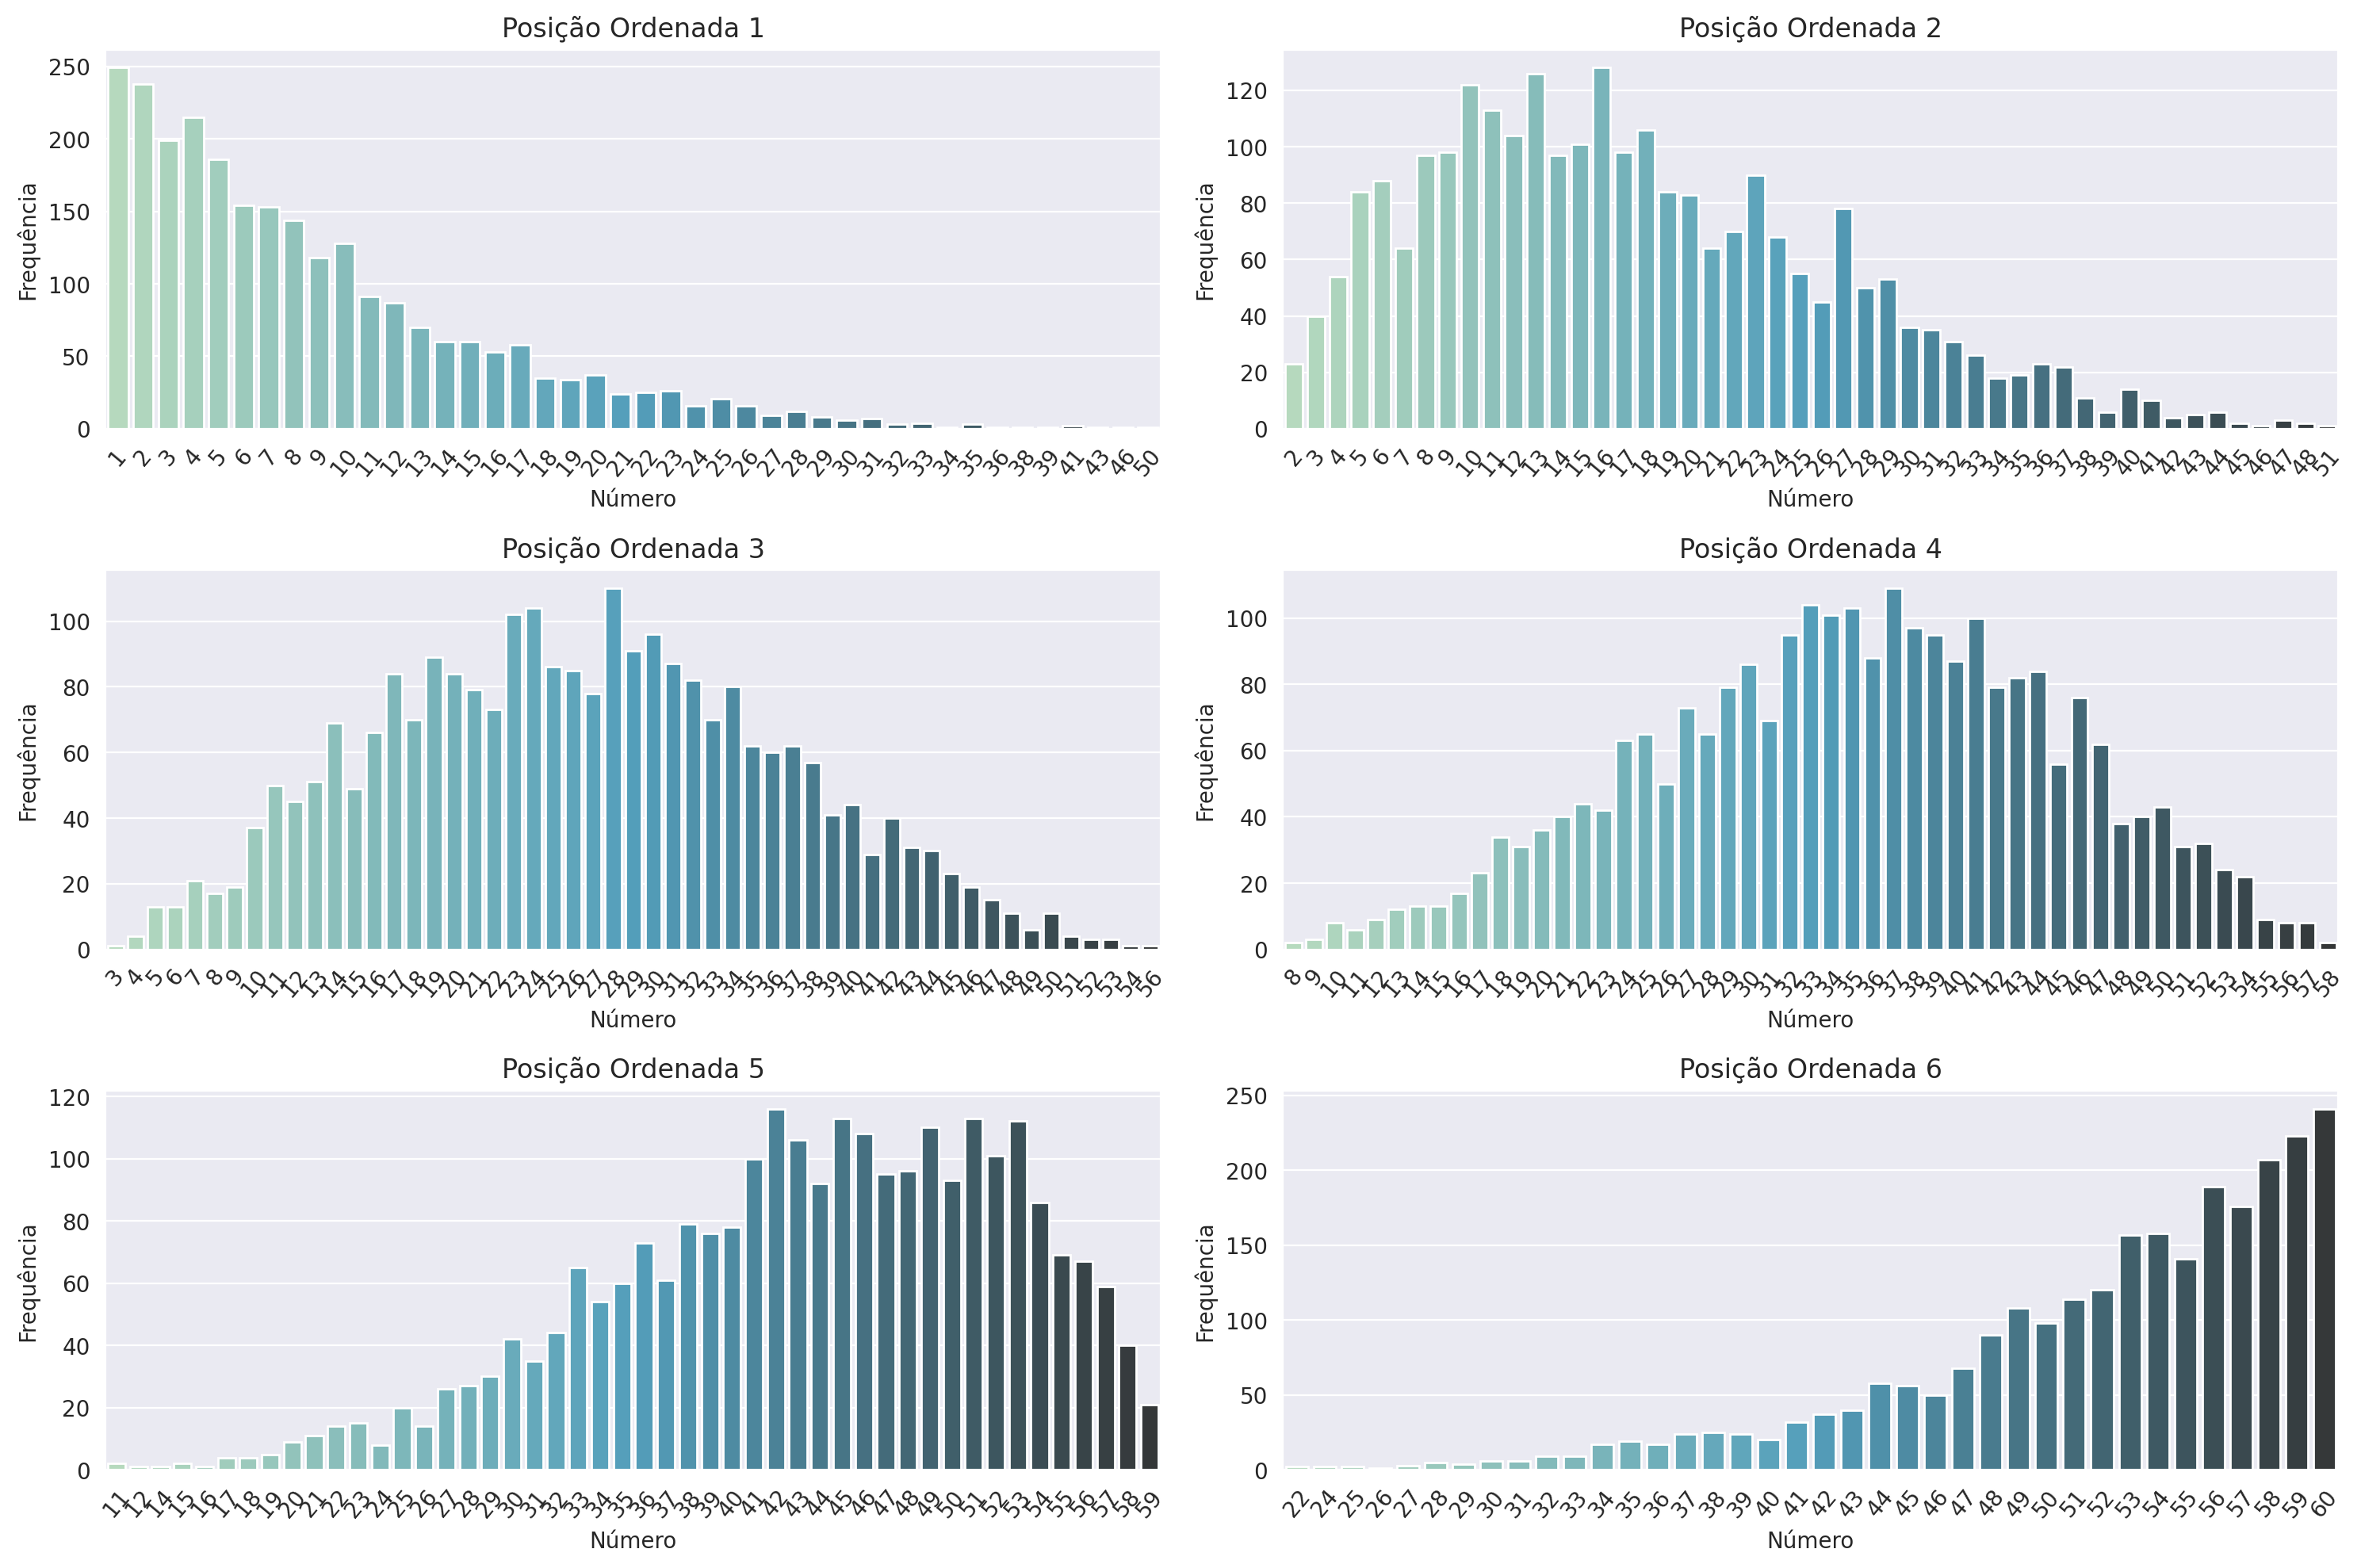

In [4]:
sorted_positions = []
for i, position in enumerate(positions):
  sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)

plt.tight_layout()
plt.show()


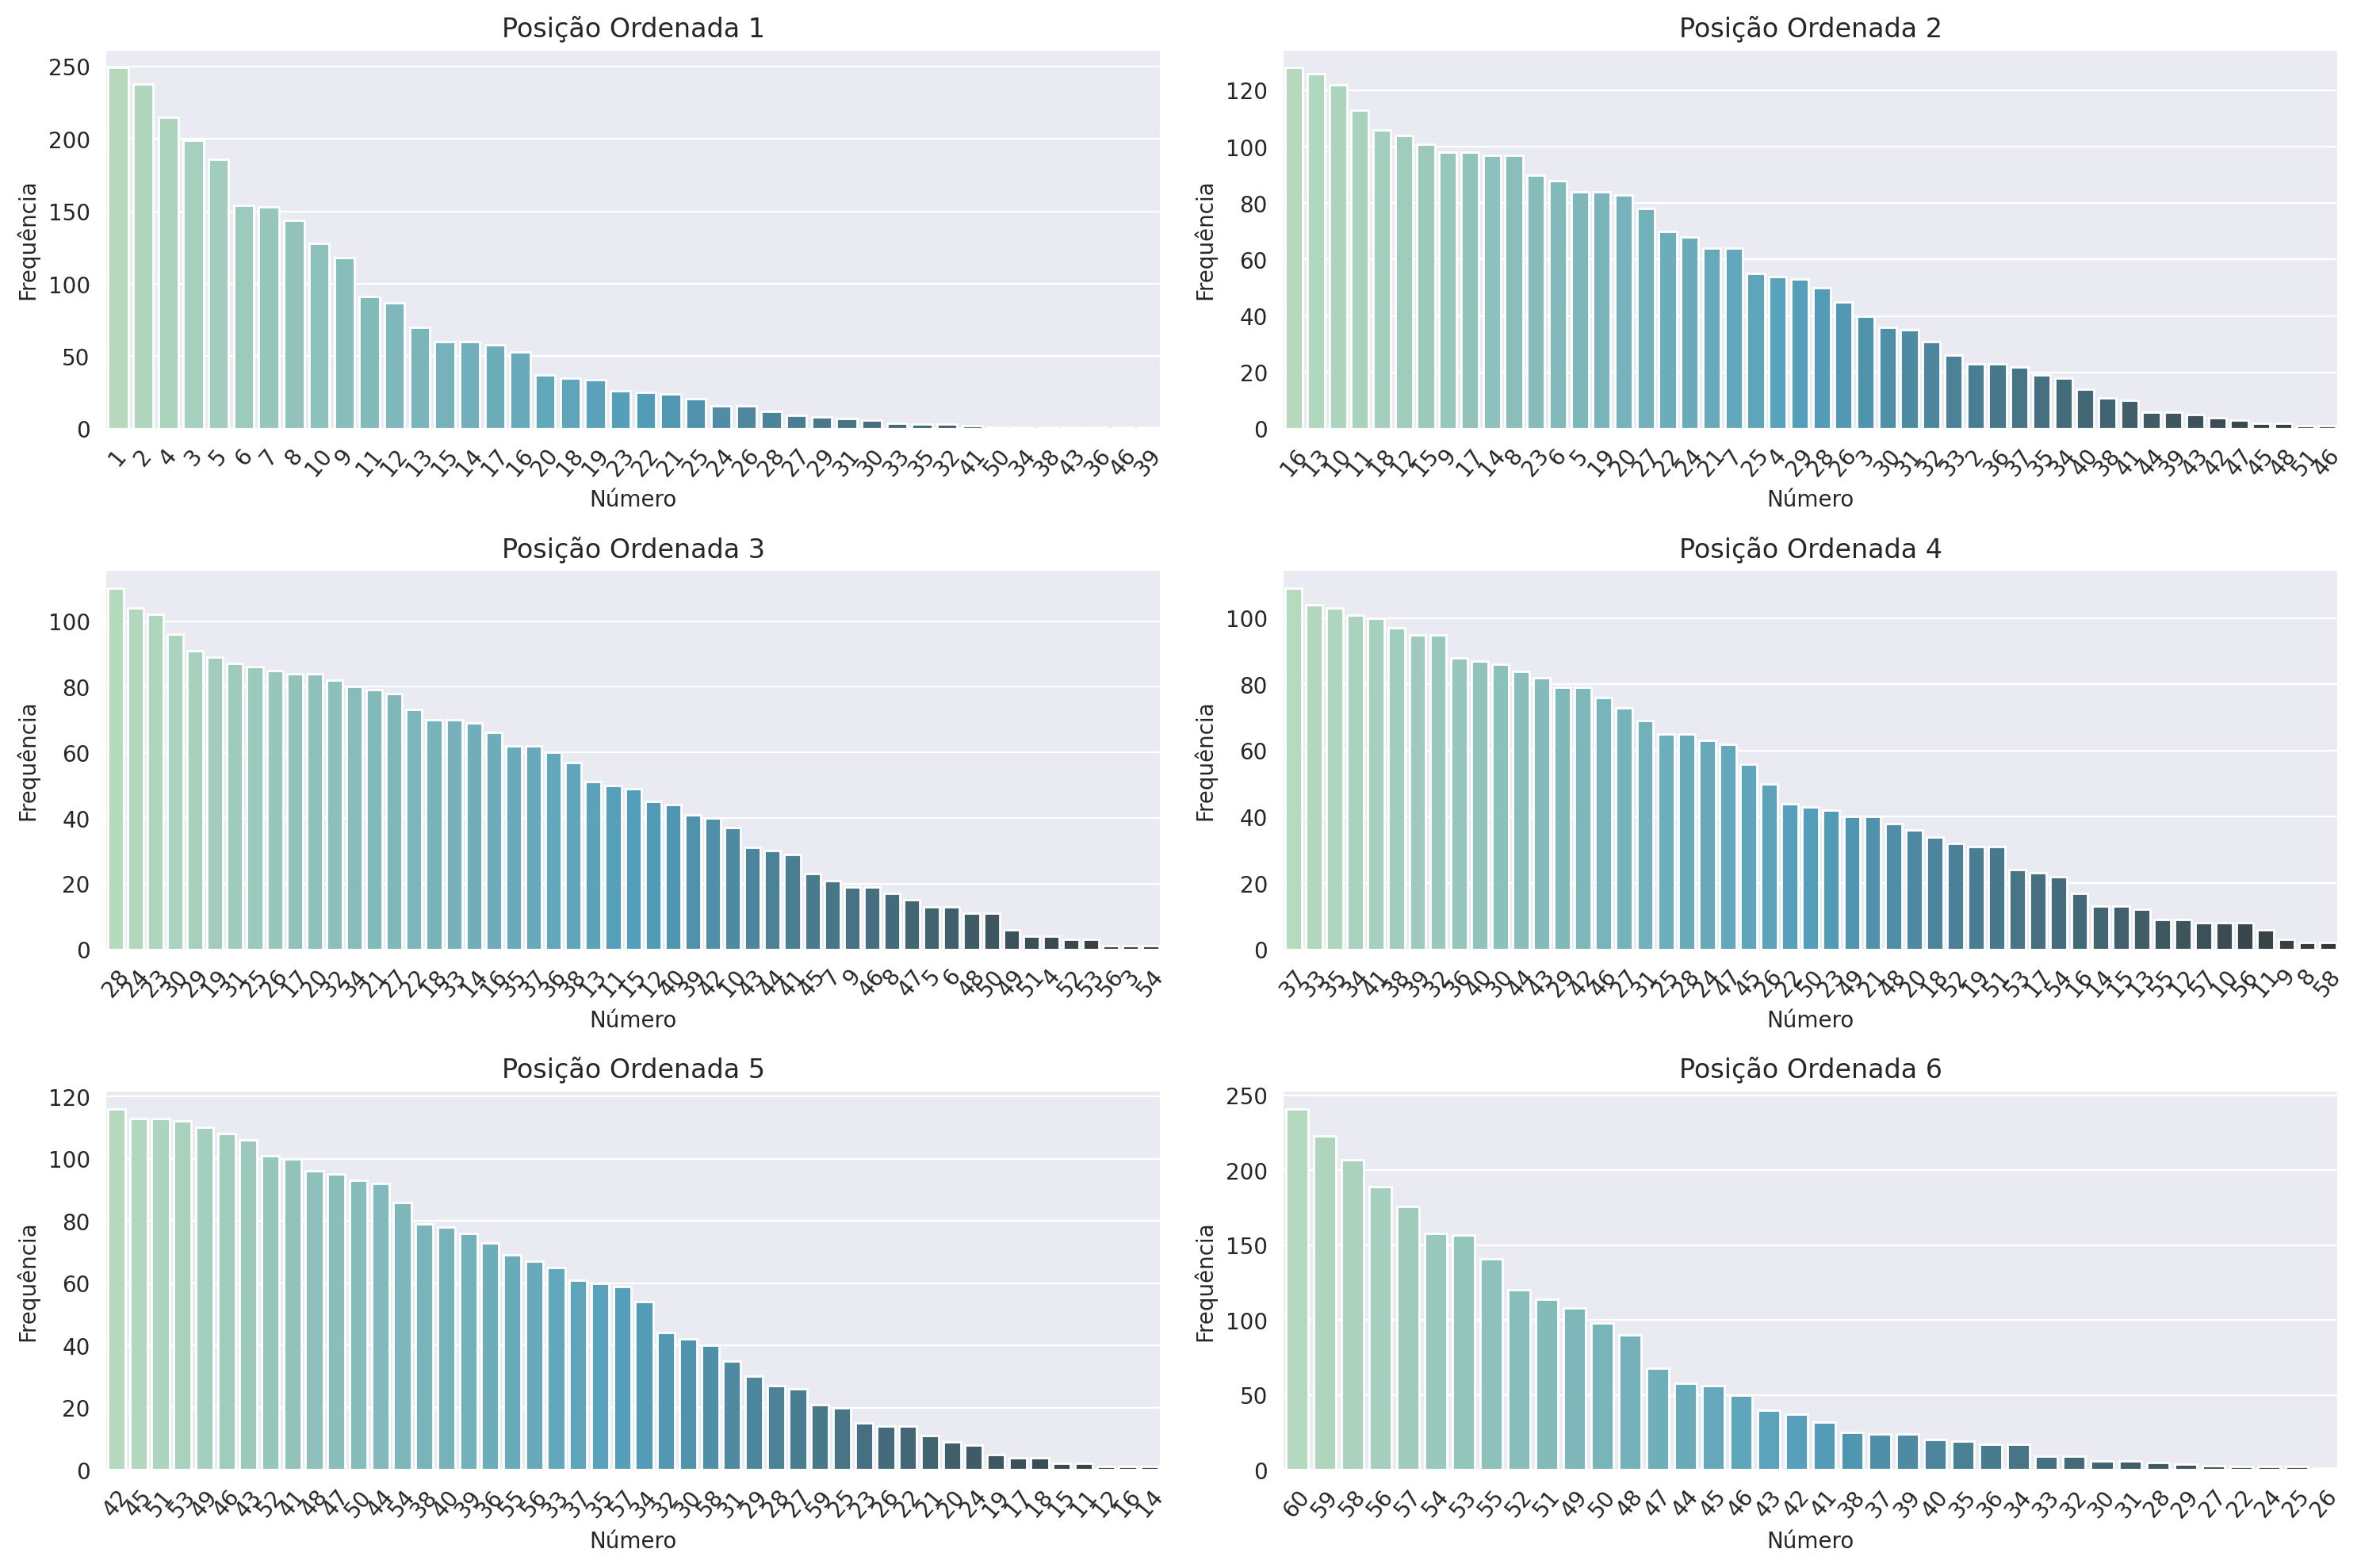

In [5]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

for i, position in enumerate(sorted_positions):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()

## Main statistics data

In [6]:
games.describe()

position_1   position_2   position_3   position_4   position_5  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000   
mean      8.612979    17.332682    26.334636    35.079359    43.545739   
std       7.021807     9.164936     9.997644     9.787314     9.025280   
min       1.000000     2.000000     3.000000     8.000000    11.000000   
25%       3.000000    10.000000    19.000000    28.000000    38.000000   
50%       7.000000    16.000000    26.000000    35.000000    45.000000   
75%      12.000000    23.000000    33.000000    42.000000    51.000000   
max      50.000000    51.000000    56.000000    58.000000    59.000000   

        position_6  
count  2558.000000  
mean     52.170446  
std       6.970963  
min      22.000000  
25%      49.000000  
50%      54.000000  
75%      58.000000  
max      60.000000

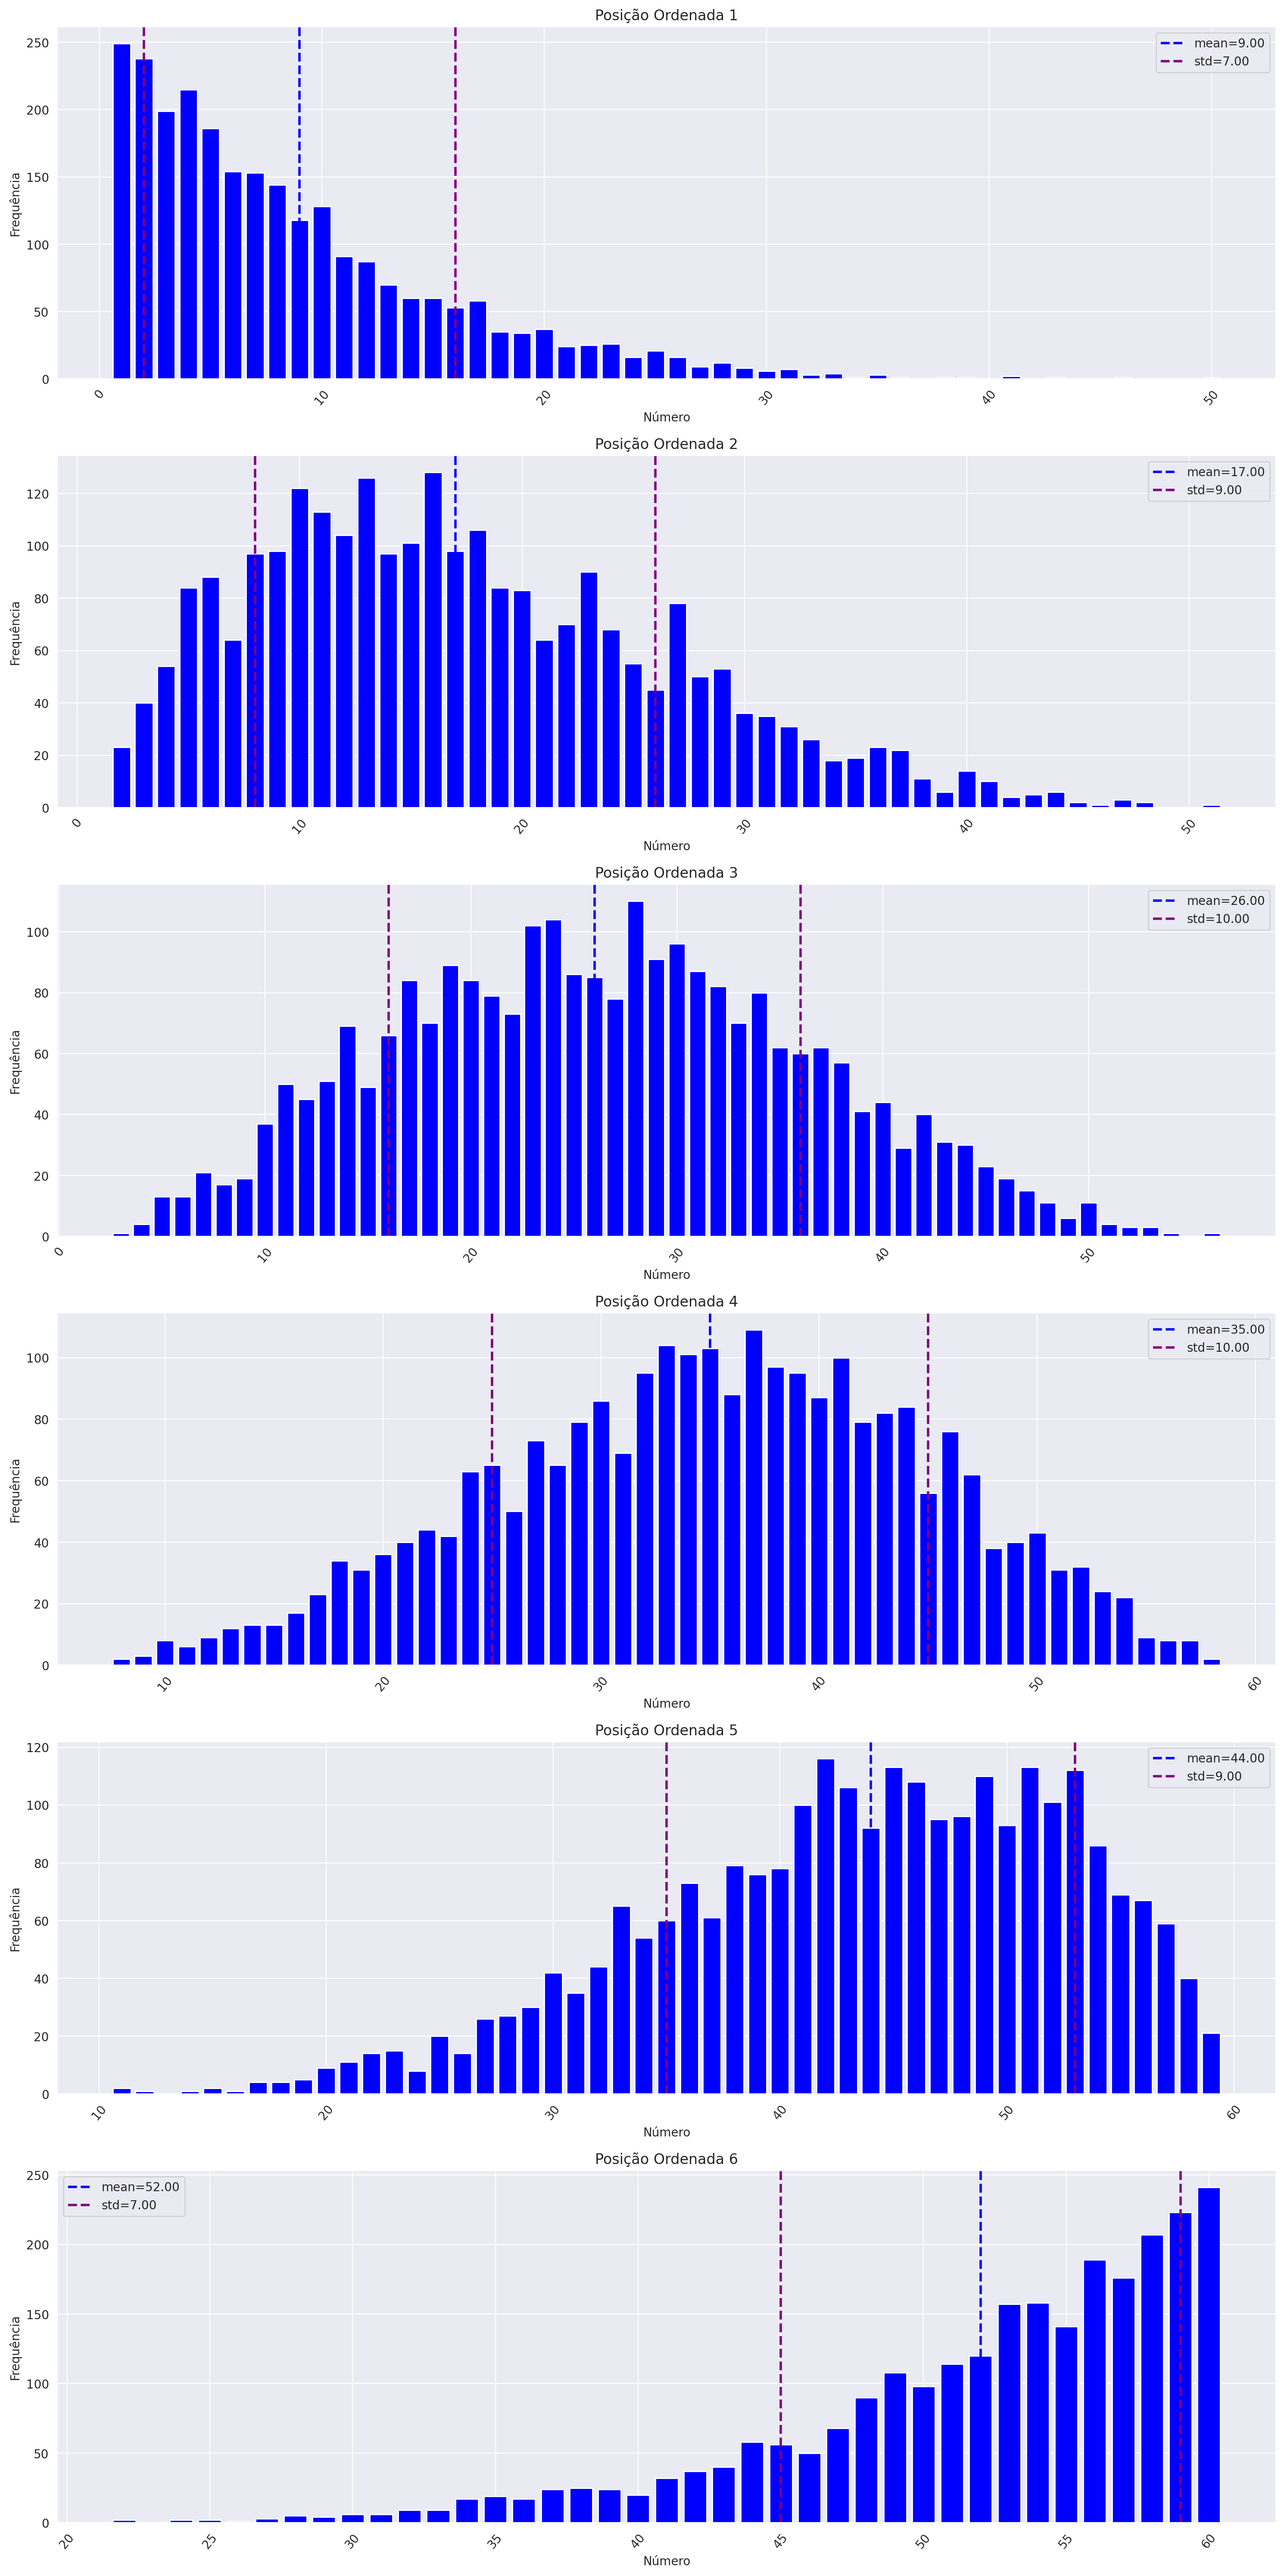

In [7]:
sorted_positions = []
for i, position in enumerate(positions):
    sorted_positions.append(games[position].value_counts())

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))
axs = axs.flatten()

def get_statistics(i):
    column_data = games.iloc[:, i]
    return {
        'mean': column_data.mean().round(0),
        'std': column_data.std().round(0),
        '25%': column_data.describe()['25%'],
        '50%': column_data.describe()['50%'],
        '75%': column_data.describe()['75%'],
    }


def display_statistics(ax, i):
    column_statistics = get_statistics(i)
    ax.axvline(column_statistics['mean'], color='blue', linestyle='dashed', linewidth=2, label=f"mean={column_statistics['mean']:.2f}")
    ax.axvline(column_statistics['mean'] - column_statistics['std'], color='purple', linestyle='dashed', linewidth=2, label=f"std={column_statistics['std']:.2f}")
    ax.axvline(column_statistics['mean'] + column_statistics['std'], color='purple', linestyle='dashed', linewidth=2)
    # ax.axvline(column_statistics['25%'], color='orange', linestyle='dashed', linewidth=2, label='25%')
    # ax.axvline(column_statistics['50%'], color='purple', linestyle='dashed', linewidth=2, label='50%')
    # ax.axvline(column_statistics['75%'], color='green', linestyle='dashed', linewidth=2, label='75%')
    
    # Add legend
    ax.legend(loc='best')


for i, position in enumerate(sorted_positions):
    axs[i].bar(position.index, position.values, color='blue')
    axs[i].set_title(f"Posição Ordenada {i+1}")
    axs[i].set_xlabel('Número')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    display_statistics(axs[i], i)

plt.tight_layout()
plt.show()


# Generating a game based on Standard Deviation

## Plotting graphs according to Std

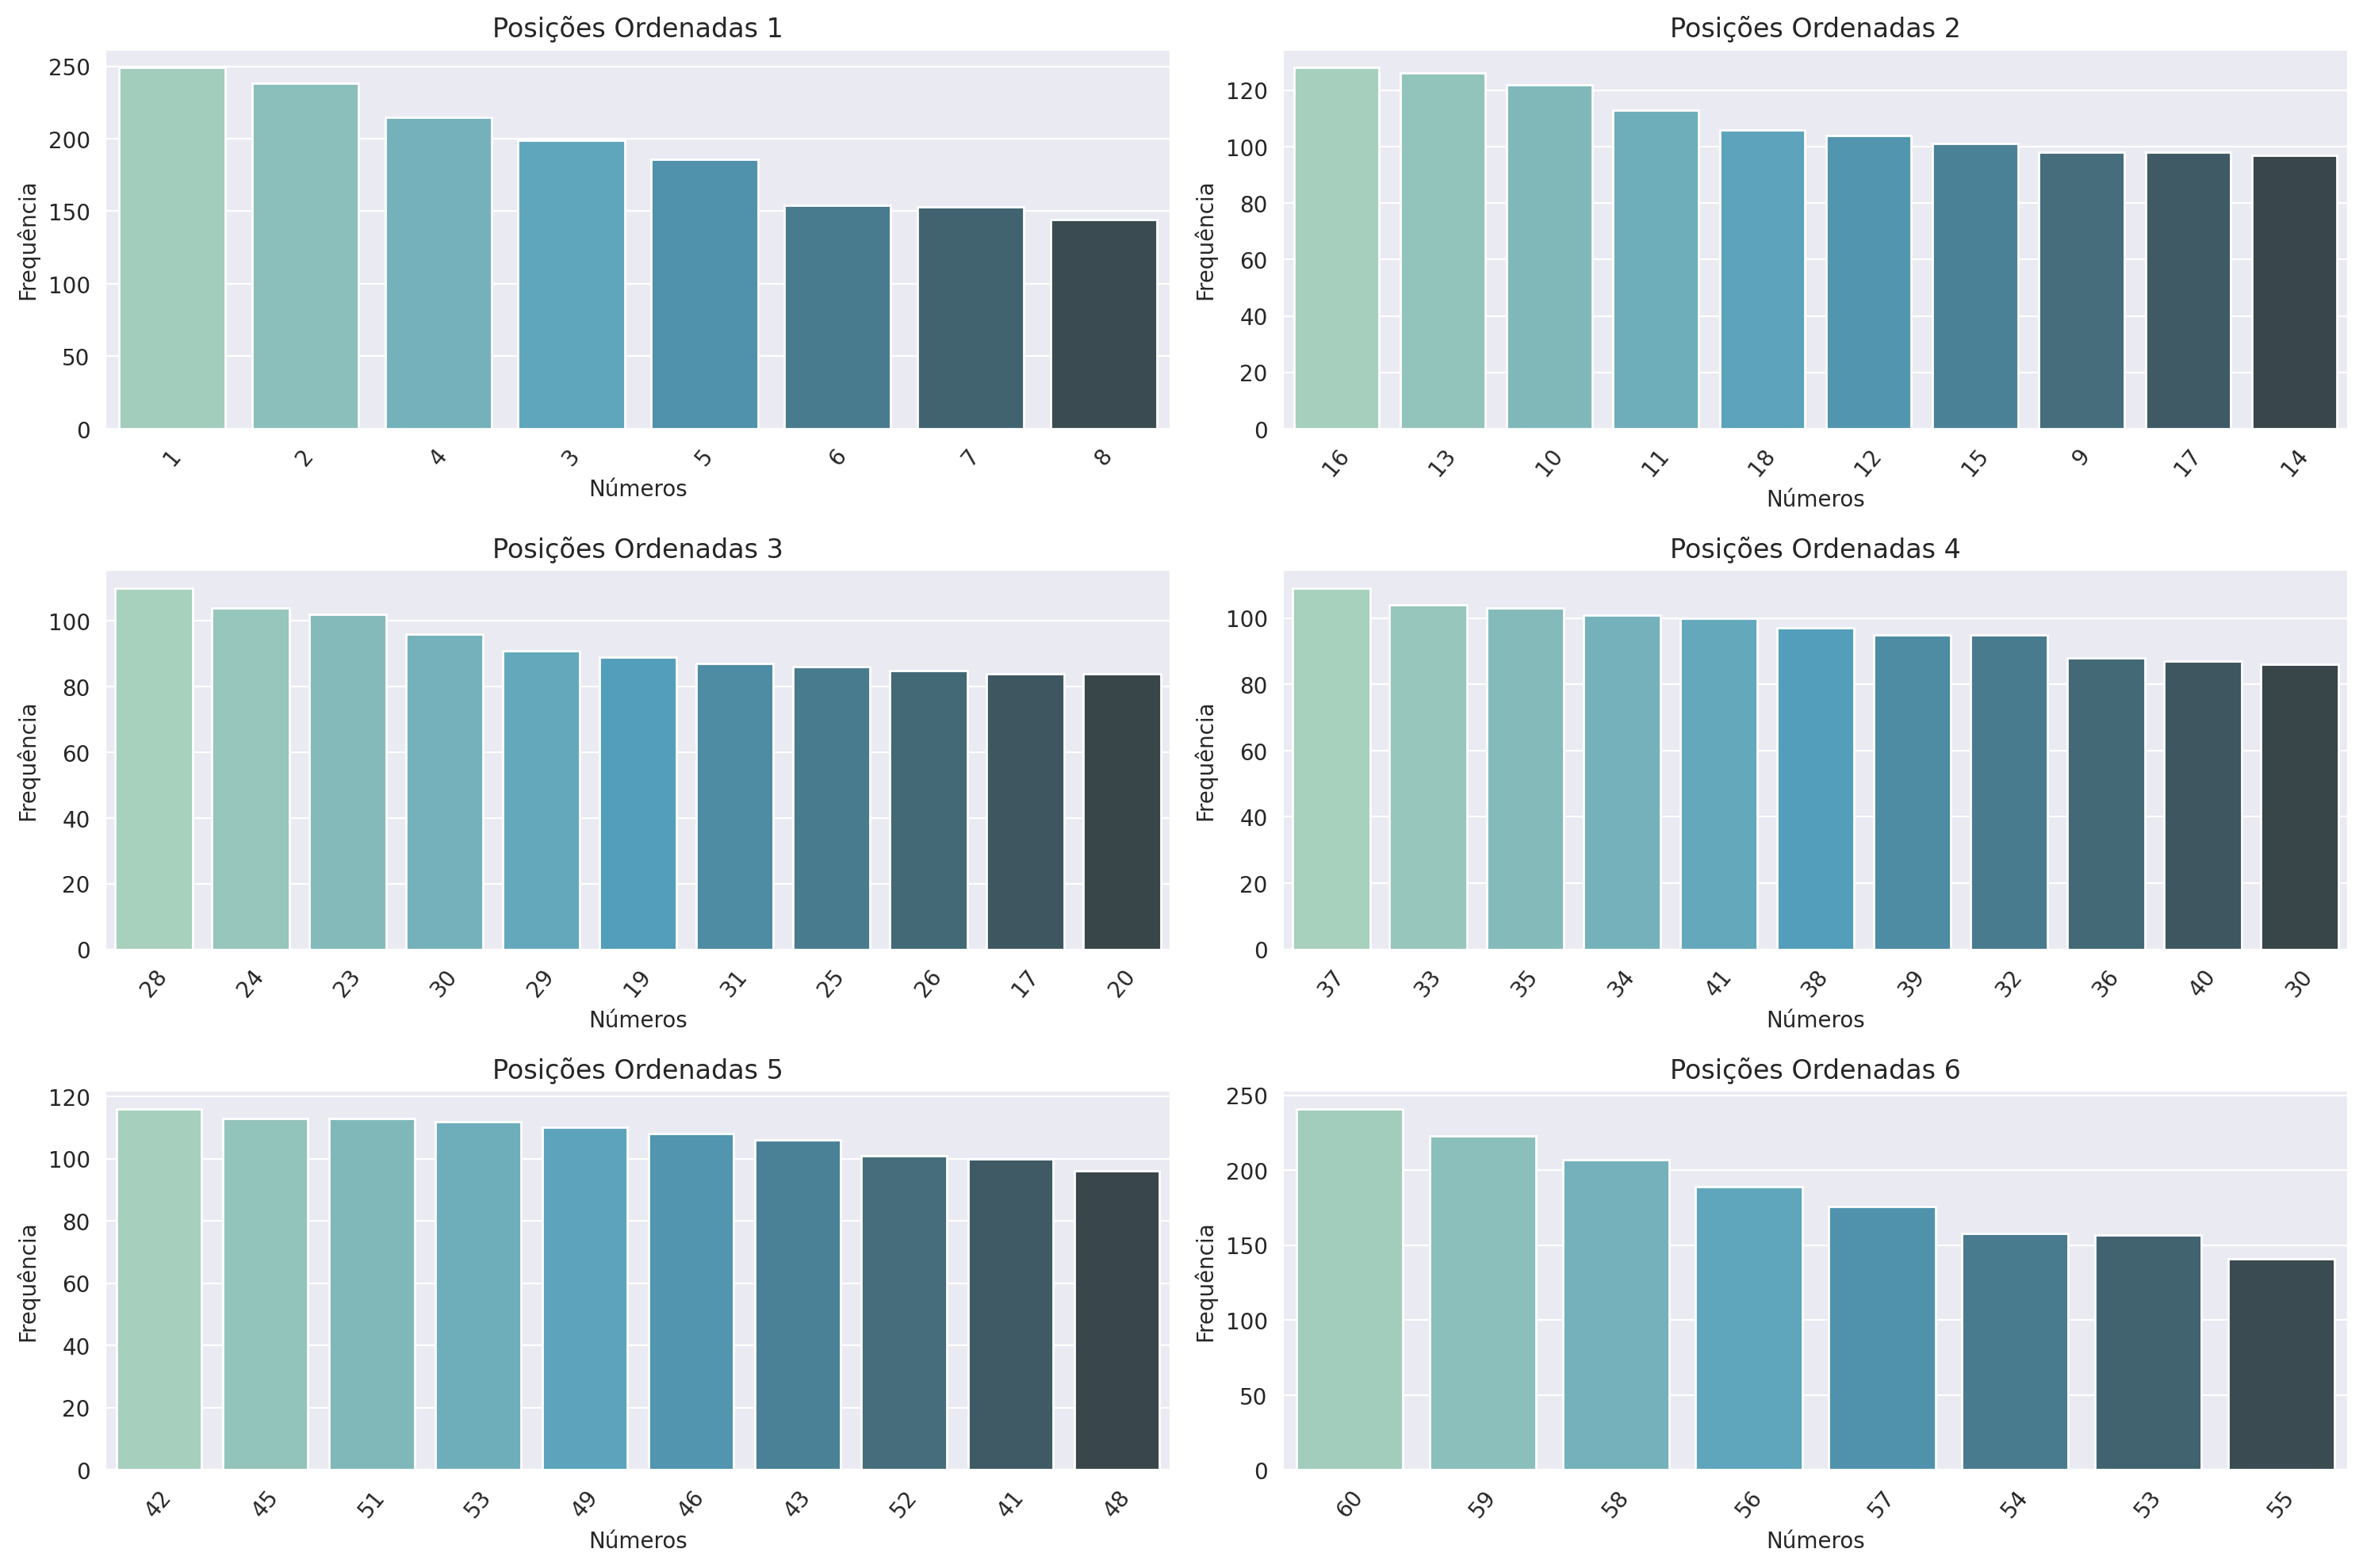

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10)) # 15, 10 -> width, height
axs = axs.flatten()

sorted_positions_limited = []

for i, position in enumerate(positions):
    counts = games[position].value_counts()
    column_statistics = get_statistics(i)
    std = column_statistics['std']
    upper_limit = int(std)
    
    # Store the original index before resetting it
    original_index = counts.index
    # Reset the index of the limited counts
    counts_limited = counts.reset_index(drop=True)
    
    # Assign the original index back to the limited counts
    counts_limited.index = original_index
    
    # Limit the counts to the upper limit
    counts_limited = counts_limited[:upper_limit+1]
    
    sorted_positions_limited.append(counts_limited)
  

# print(sorted_positions_limited)
for i, position in enumerate(sorted_positions_limited):
    sns.barplot(x=position.index, y=position.values, ax=axs[i], order=position.index, palette="GnBu_d")
    axs[i].set_title(f"Posições Ordenadas {i+1}")
    axs[i].set_xlabel('Números')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', labelrotation=50)
    axs[i].set_xticklabels(position.index) # set x-axis tick labels
    
plt.tight_layout()
plt.show()


## Generating a game

In [9]:
import random

def get_guesses():
  guesses = []
  for i, position in enumerate(sorted_positions_limited):
      guess = position.sample().index[0]
      guesses.append(guess)
  return guesses


## Check the guess in the database and generate game based on Std

In [10]:
from IPython.display import Markdown, display, HTML

# Get past results
past_results = games.values.tolist()
game_number = info.iloc[:, 0].to_list()
date = info.iloc[:, 1].to_list()

# Check guesses against past results
guesses = get_guesses()
correct_guesses = [0] * len(past_results)
for i, result in enumerate(past_results):
    for guess in guesses:
        if guess in result:
            correct_guesses[i] += 1

max_correct_guesses_index = correct_guesses.index(max(correct_guesses))
max_correct_guesses = correct_guesses[max_correct_guesses_index]

if max_correct_guesses >= 4:
    if max_correct_guesses == 4:
        type_of_prize = "Quadra"
    elif max_correct_guesses == 5:
        type_of_prize = "Quina"
    elif max_correct_guesses == 6:
        type_of_prize = "Sena"
    past_result = past_results[max_correct_guesses_index]
    game_number = game_number[max_correct_guesses_index-1]
    date = date[max_correct_guesses_index-1]
else:
    type_of_prize = "Você não ganhou nenhum prêmio."
    past_result = None
    game_number = None
    date = None

# Print output centered on the screen
output = "<center>"
output += "<h1>Número máximo de acertos: {}</h1>".format(max_correct_guesses)
output += "<h1>Palpite:</h1>"
output += '<div style="display: flex; justify-content: center; align-items: center;">'
for guess in guesses:
    output += '<div style="background-color: green; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
    output += str(guess)
    output += '</div>'

output += '</div>'

# Print past result ball
if past_result is not None:
    output += "<h1>Resultado anterior:</h1>"
    output += '<div style="display: flex; justify-content: center; align-items: center;">'
    for value in past_result:
        output += '<div style="background-color: blue; width: 50px; height: 50px; border-radius: 50%; margin: 5px; display: flex; justify-content: center; align-items: center; font-size: 24px; color: white;">'
        output += str(value)
        output += '</div>'

    output += '</div>'
    output += '<div style="width: 20%; margin: 10px; border: 2px solid; border-radius: 8px;">'
    output += '<p>Data: {}</p>'.format(date)
    output += '<p>Tipo de prêmio: {}</p>'.format(type_of_prize)
    output += '<p>Jogo número: {}</p>'.format(game_number)
    output += '</div>'

else:
    output += '<h1 style="color: red">{}</h1>'.format(type_of_prize)
output += "</center>"
display(HTML(output))


## Using Machine Learning to predict a new result

### Plotting time series for positions

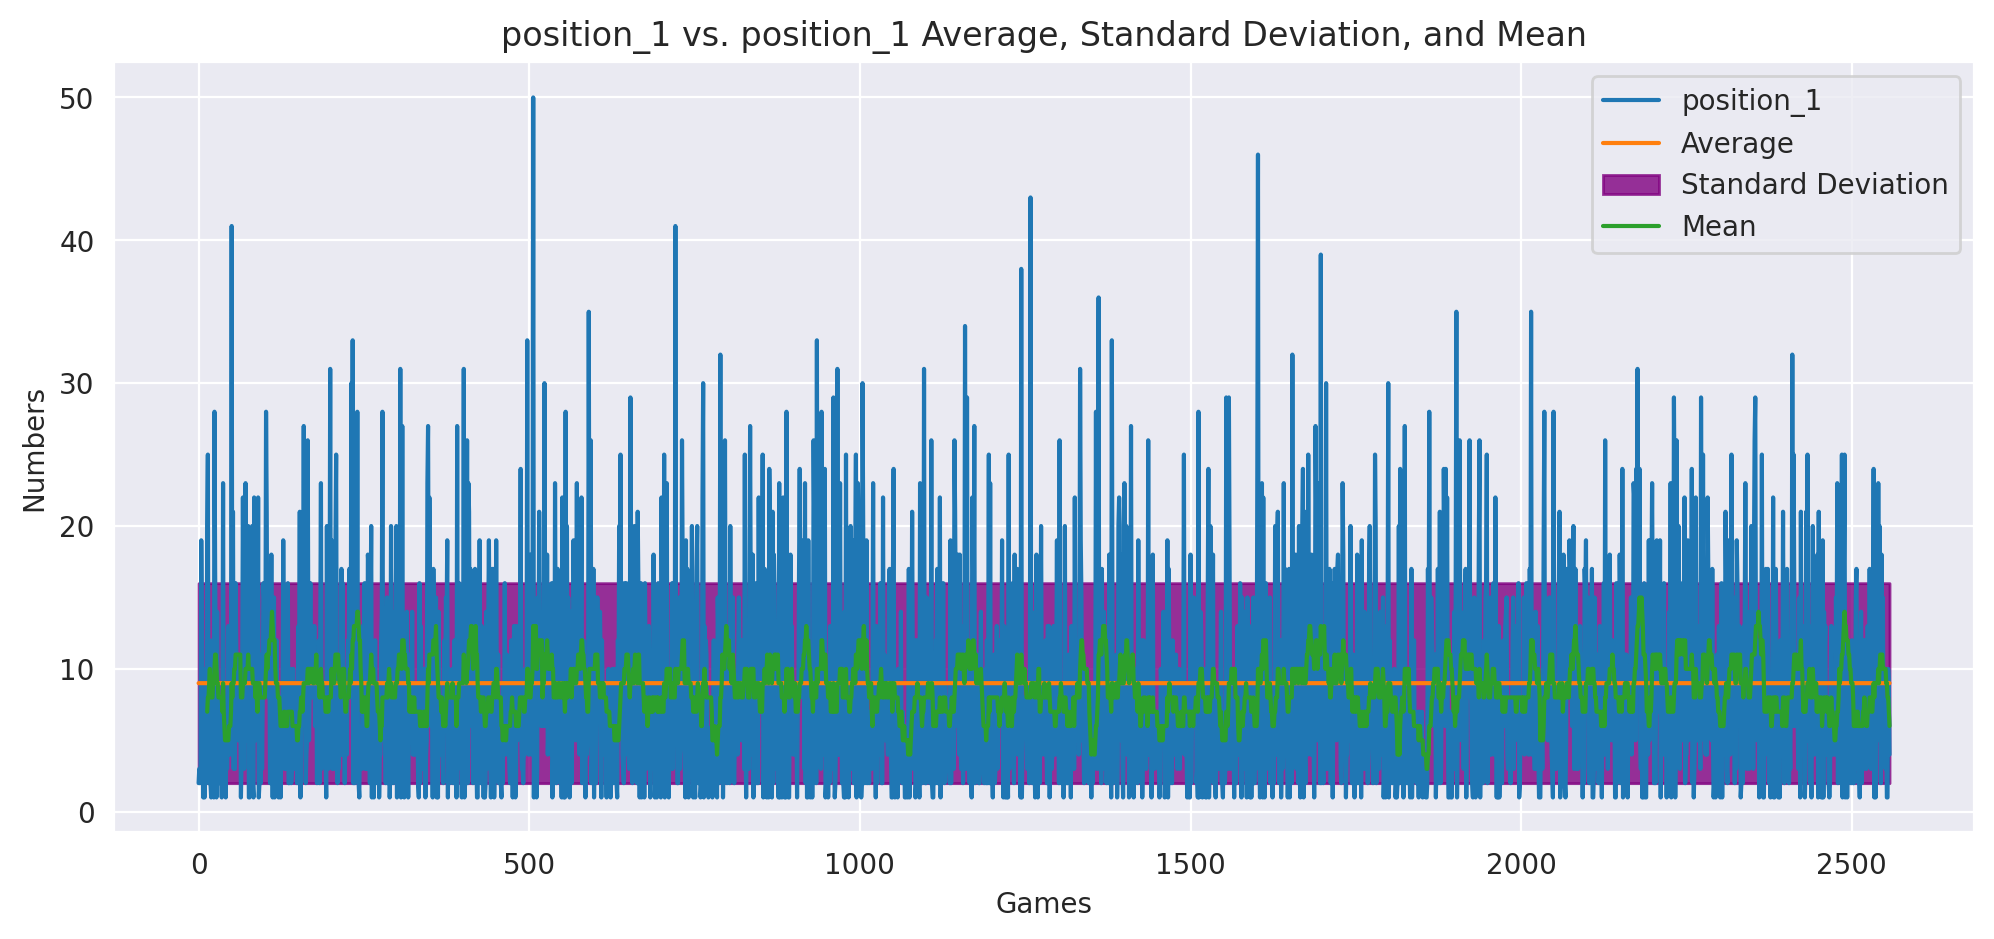

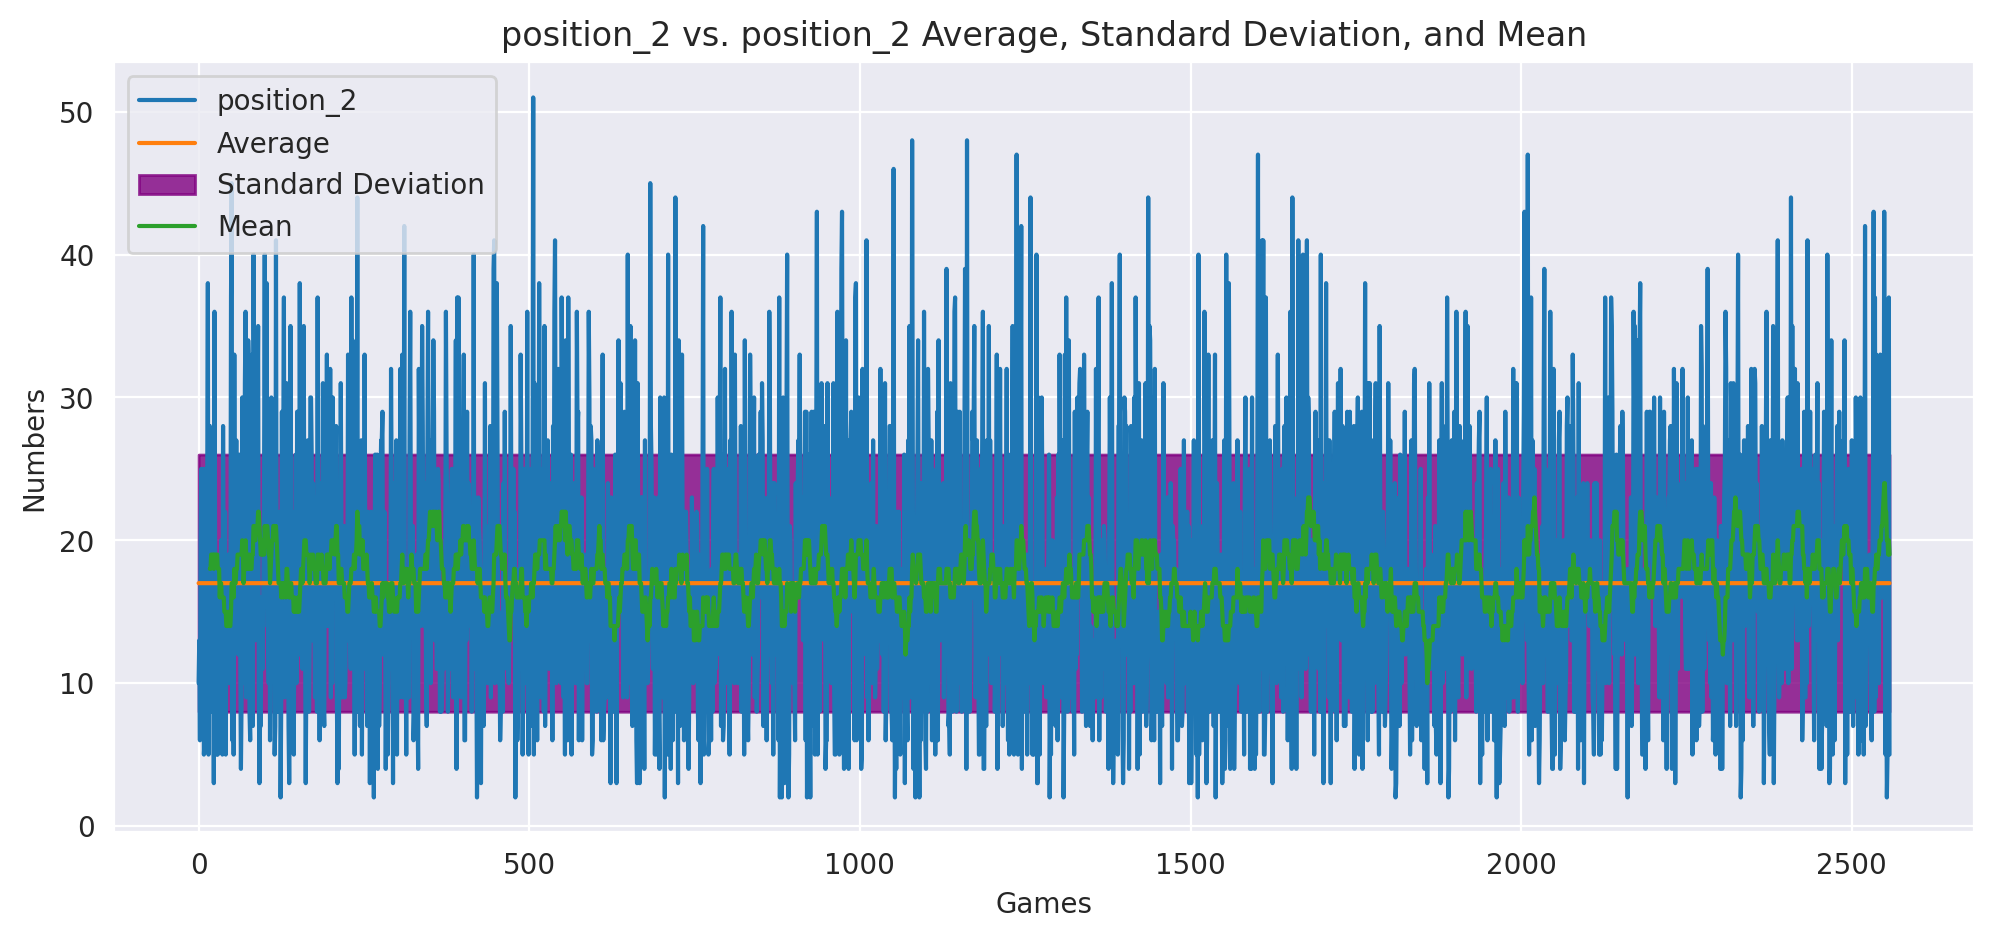

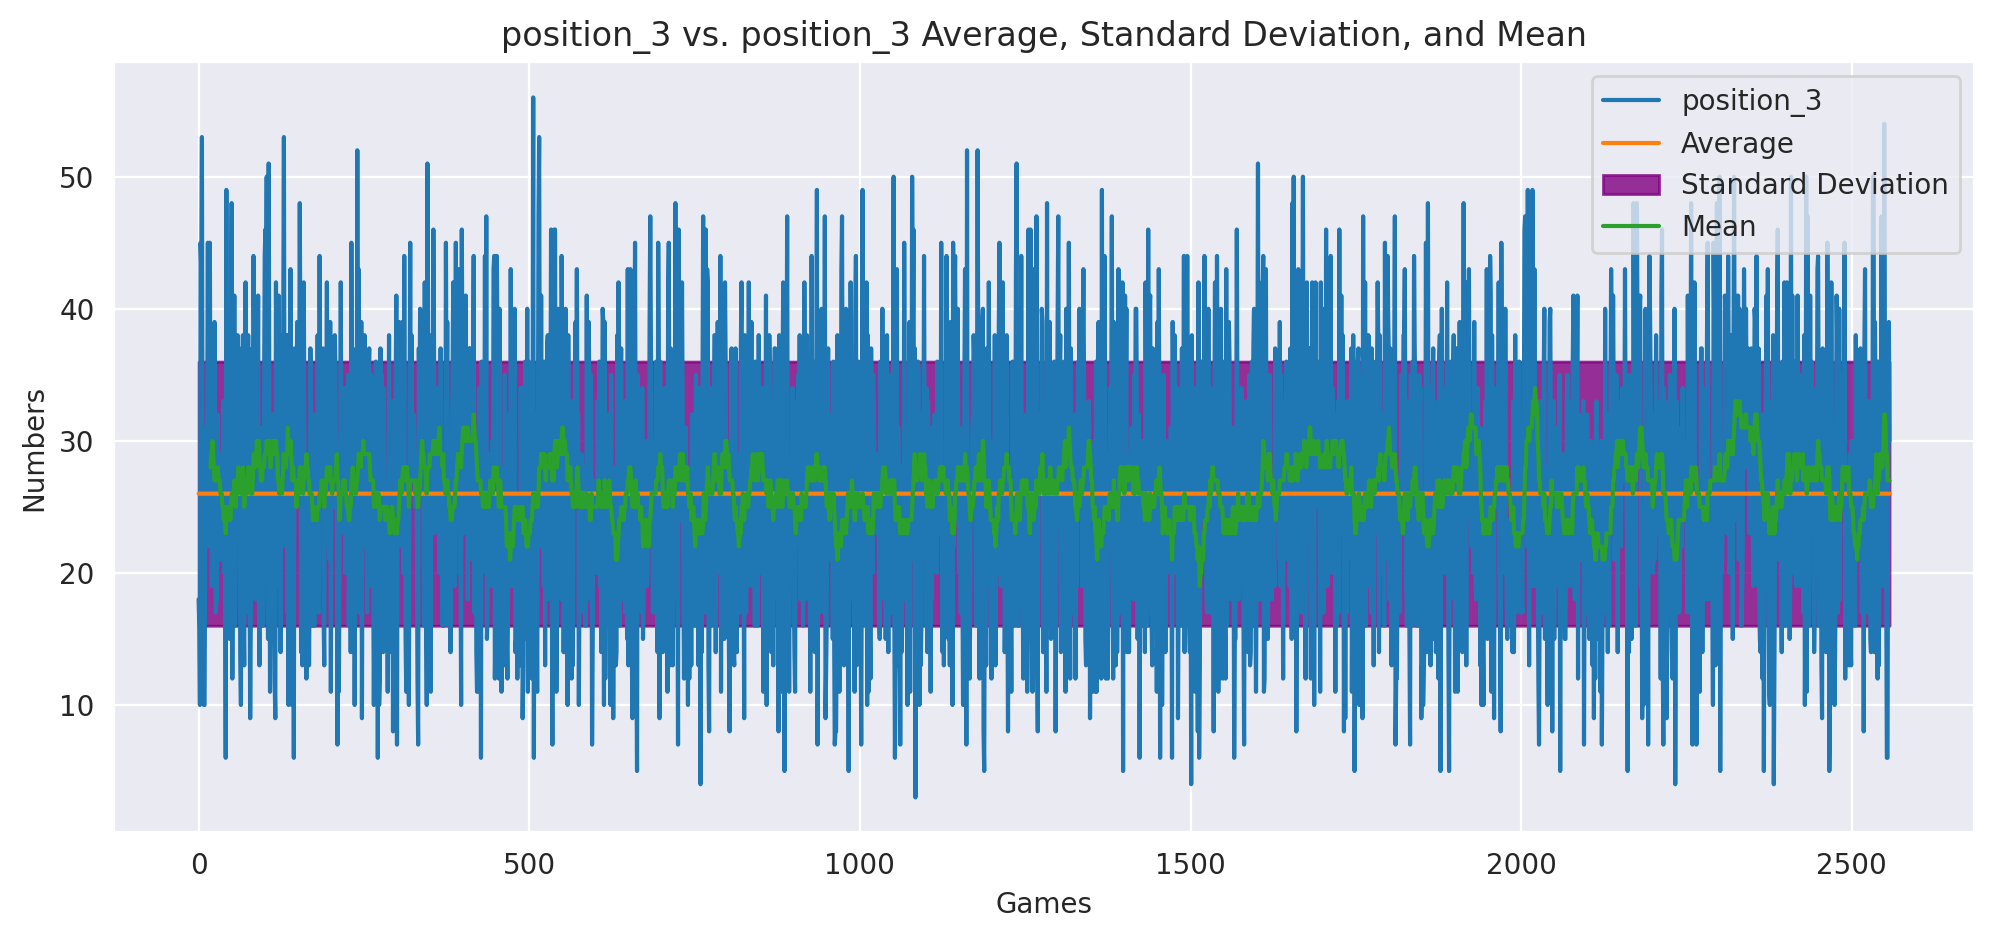

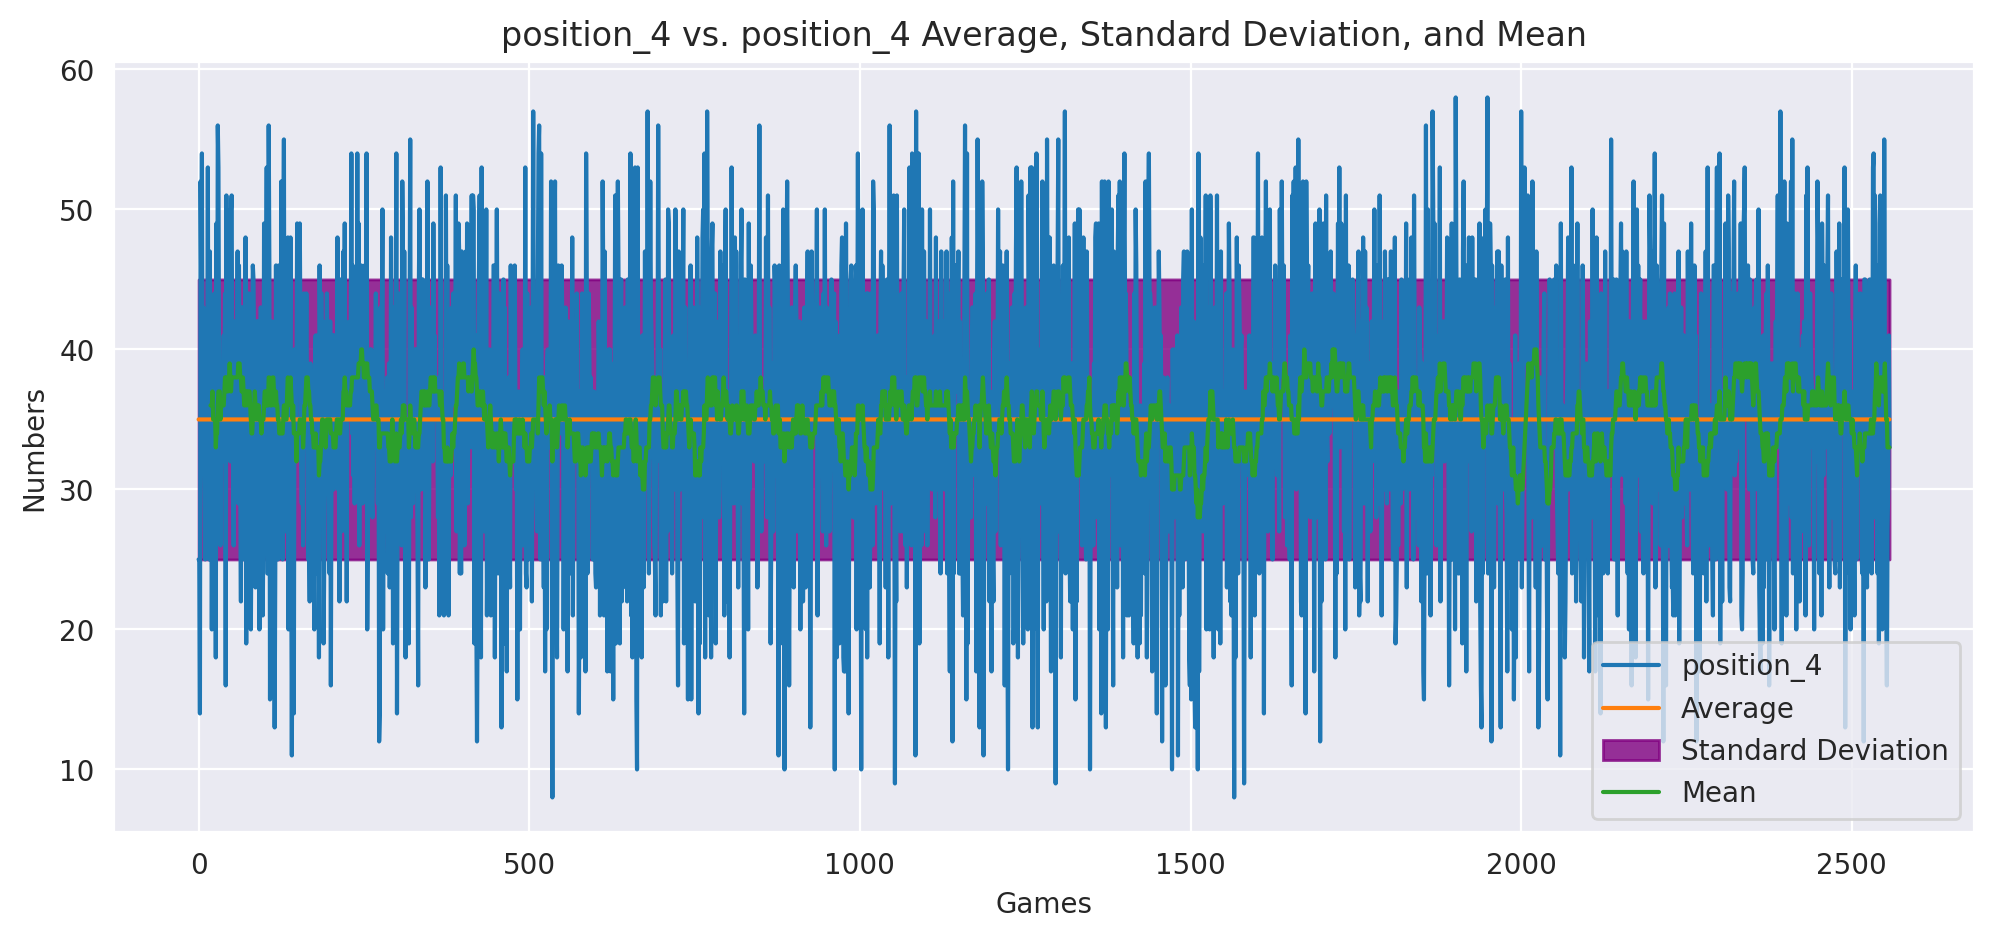

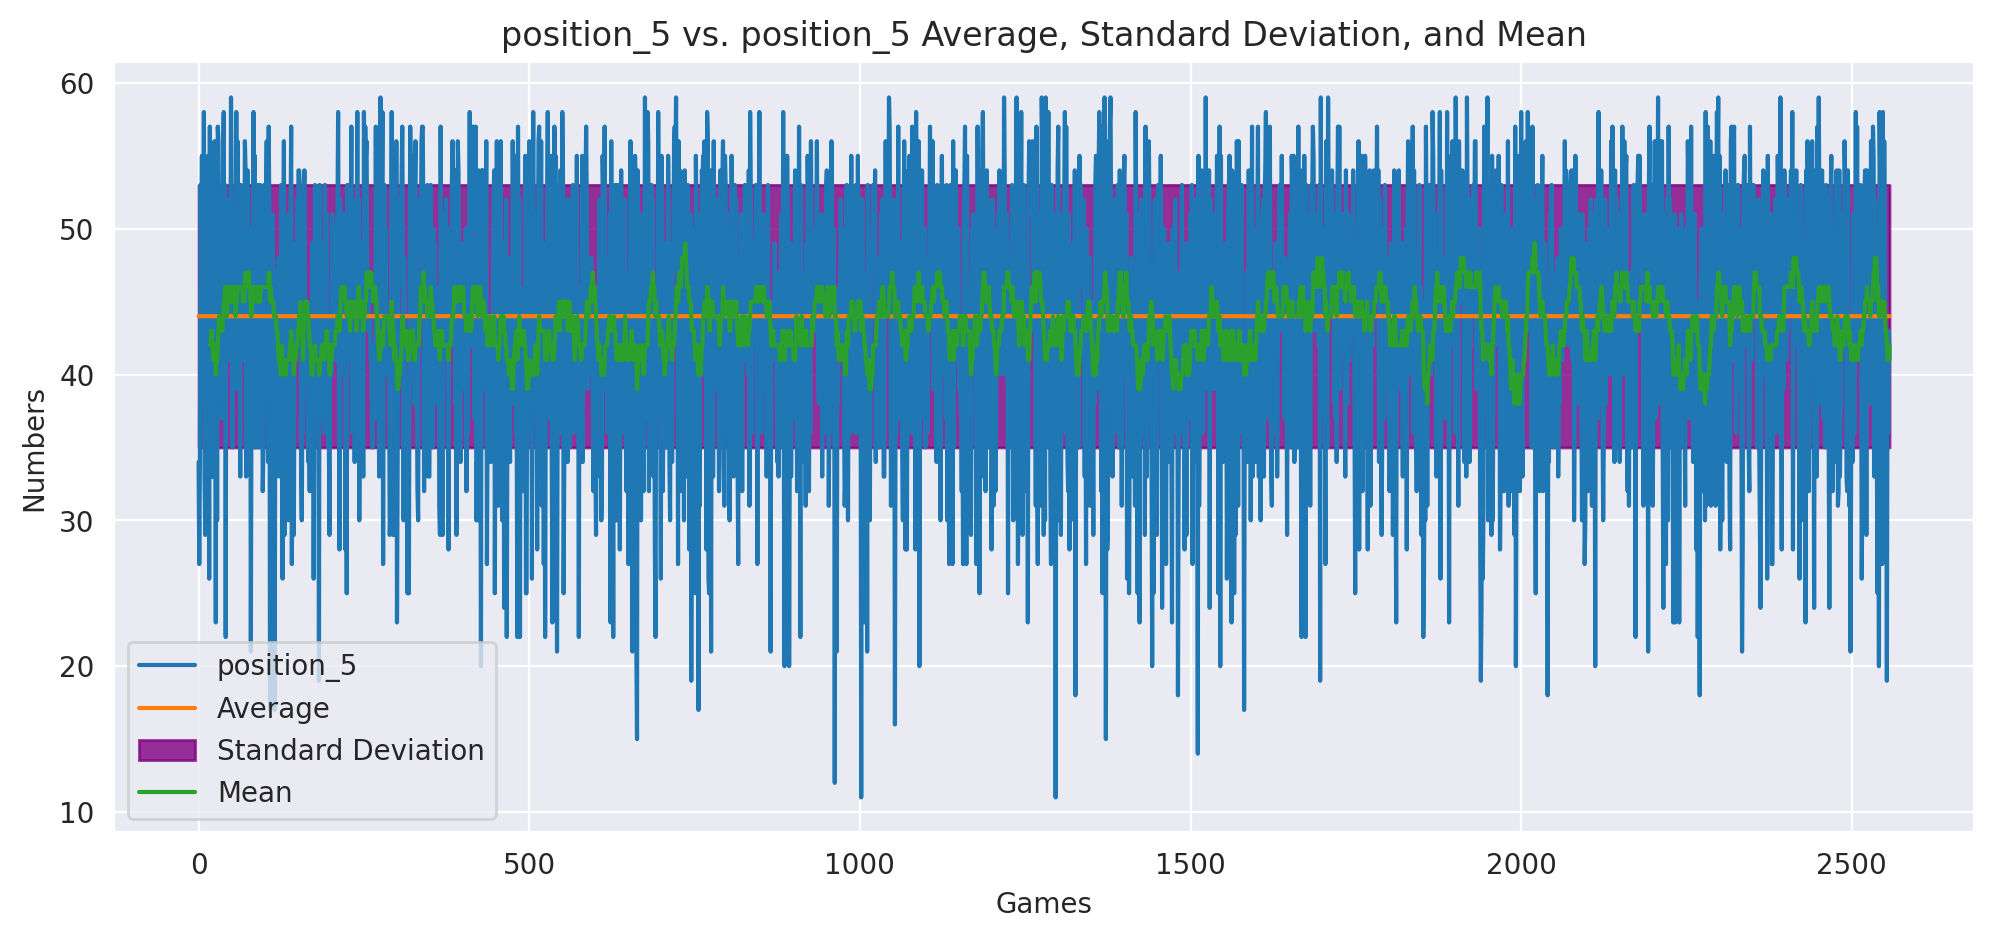

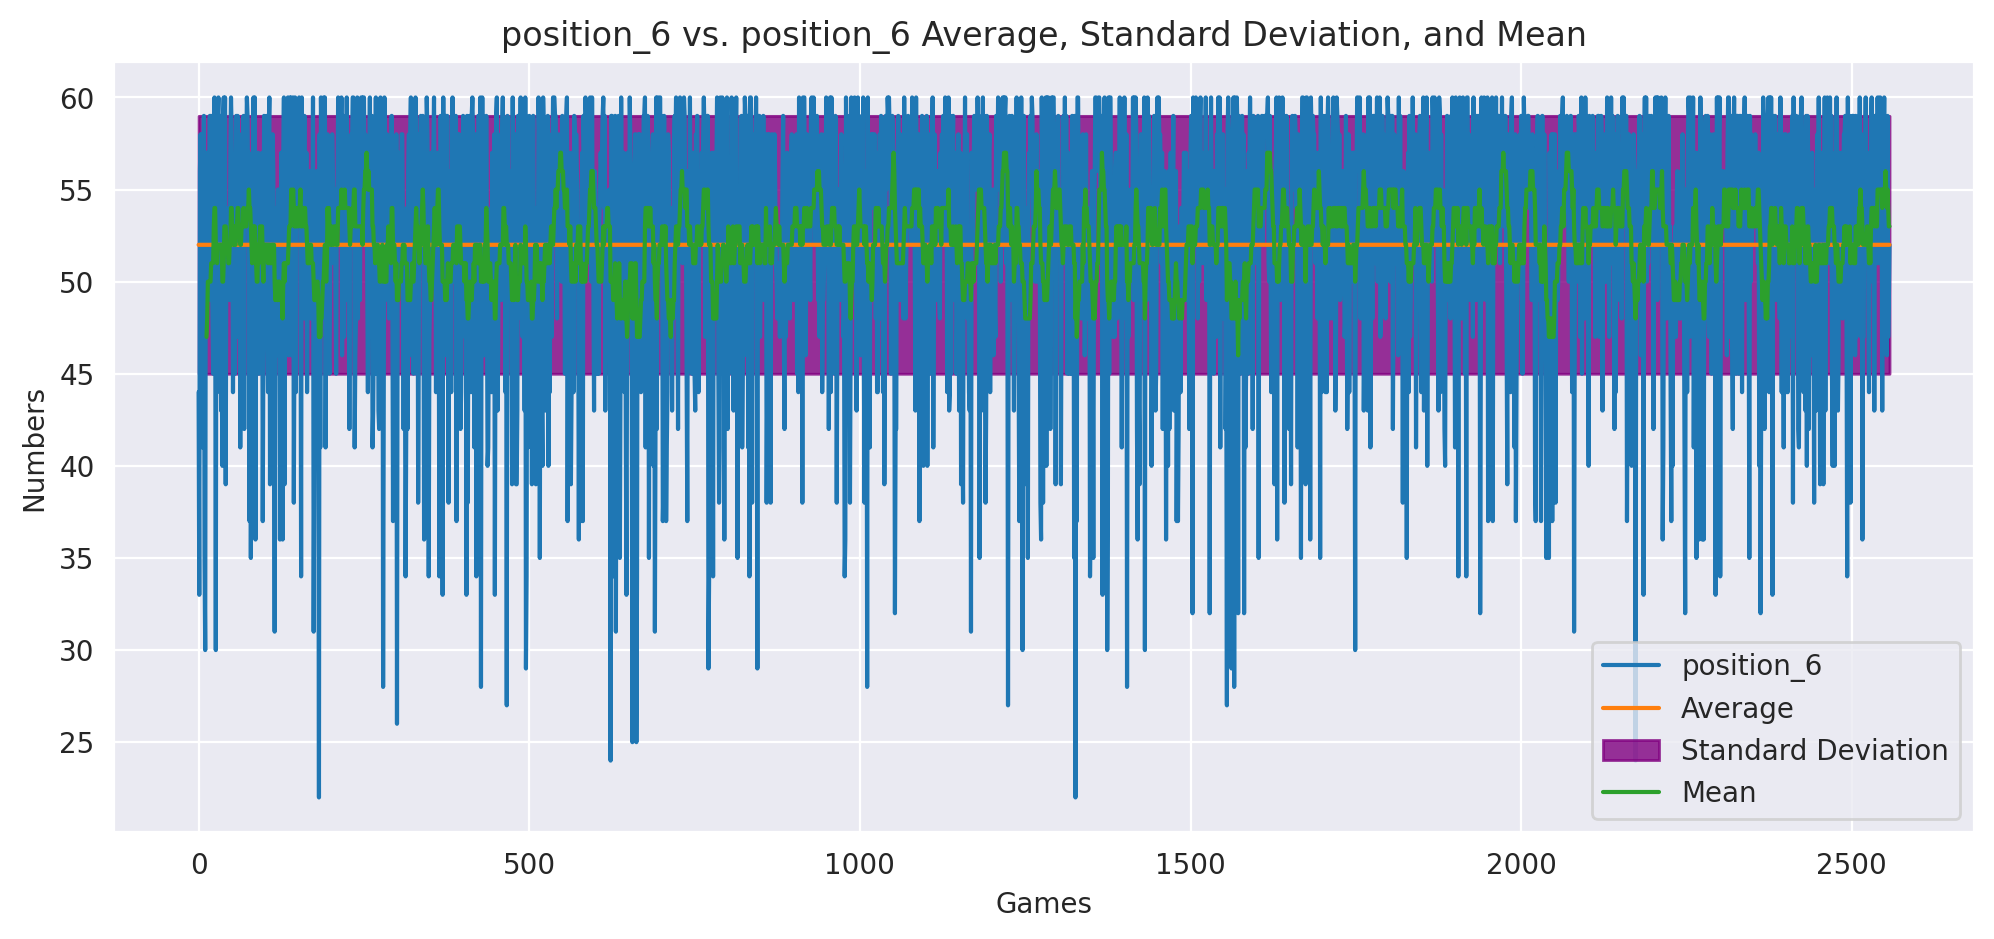

In [11]:
# Create a dictionary to store position data
position_data = {}

# Iterate over the positions and plot each position's graph
for position in positions:
    # Extract position data and calculate its average and standard deviation
    position_data[position] = games[position]
    position_avg = pd.Series([position_data[position].mean()] * len(position_data[position])).round(0)
    position_std = pd.Series([position_data[position].std()] * len(position_data[position])).round(0)
    position_std_max = pd.Series([(position_avg + position_std)[0]] * len(position_data[position])).round(0)
    position_std_min = pd.Series([(position_avg - position_std)[0]] * len(position_data[position])).round(0)
    window_length = int(position_data[position].std() * 2)
    position_data[position+'_mean'] = position_data[position].rolling(window_length).mean().round(0) # Adding the rolling mean
    
    # Plot the position graph with average, standard deviation, and mean
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(position_data[position], label=position)
    ax.plot(position_avg, label='Average')
    ax.fill_between(position_data[position].index, position_std_min[0], position_std_max[0], alpha=0.8, color='purple', label='Standard Deviation')
    ax.plot(position_data[position+'_mean'], label='Mean')
    ax.set_xlabel('Games')
    ax.set_ylabel('Numbers')
    ax.set_title(position + ' vs. ' + position + ' Average, Standard Deviation, and Mean')
    ax.legend()
    plt.show()


### Using ARIMA Model to predict next result

#### Prediction using games model

In [12]:
from statsmodels.tsa.stattools import adfuller

# Check data characteristics
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    # Get the ADF test results
    adf_stat = dftest[0]
    p_val = dftest[1]
    num_lags = dftest[2]
    num_obs = dftest[3]
    crit_vals = dftest[4]

    # Check if the dataset is stationary
    if p_val <= 0.05:
        is_stationary = True
    else:
        is_stationary = False

    # Check if the dataset is predictable
    if is_stationary and abs(adf_stat) > crit_vals['5%']:
        is_predictable = True
    else:
        is_predictable = False

    # Print the results
    print("Is stationary? ", is_stationary)
    print("Is predictable? ", is_predictable, "\n")

for position in positions:
    print('AD Test ', position, ':')
    ad_test(position_data[position])





AD Test  position_1 :
Is stationary?  True
Is predictable?  True 

AD Test  position_2 :
Is stationary?  True
Is predictable?  True 

AD Test  position_3 :
Is stationary?  True
Is predictable?  True 

AD Test  position_4 :
Is stationary?  True
Is predictable?  True 

AD Test  position_5 :
Is stationary?  True
Is predictable?  True 

AD Test  position_6 :
Is stationary?  True
Is predictable?  True 



# ARIMA MODEL

In [13]:
# # Define parameters for ARIMA model
# # p: Qty of past numbers considered
# # d: Hability to capture flutuations and spikes
# # q: Moving average window
# p, d, q = 5, 1, 1

# # Fit ARIMA models for each position
# models = {}
# avg_array = []
# std_array = []
# for position in positions:
#     # Get global average
#     input_data = position_data[position]
#     avg_array.append(input_data.mean().round(0))
#     std_array.append(input_data.std().round(0))
#     # Replace NaN values with 0
#     input_data.fillna(0, inplace=True)
#     # Fit the model
#     model = ARIMA(input_data.values, order=(p, d, q)).fit()
#     models[position] = model

# # Predict next numbers for each position
# predictions = {}
# for position in positions:
#     # Get the predicted values
#     pred = models[position].forecast(steps=1)
#     predictions[position] = int(pred[0])

# predicted_numbers = [predictions[position] for position in positions]
    
# # Check if predicted numbers fit the std
# std_array_range = []
# check_prediction = [True] * len(positions)
# prediction_error_pct = []

# for position in range(0,len(positions)):
#     prediction_error = round(avg_array[position] - predicted_numbers[position], 0)
#     prediction_error_pct.append(round(prediction_error/avg_array[position] * 100, 2))
#     std_min = avg_array[position] - std_array[position];
#     std_max = avg_array[position] + std_array[position];
#     std_array_range.append(str(std_min) + ' - ' + str(std_max))
#     # Check if the predicted number is outside the range defined by the mean +/- the standard deviation
#     if predicted_numbers[position] < std_min or predicted_numbers[position] > std_max:
#         check_prediction[position].append(False)
    


# print('Predicted Numbers: ', predicted_numbers)
# print('Mean: ', avg_array)
# print('Standard Deviation (min-max): ', std_array_range)
# print('Predicted value inside of range with Std: ', check_prediction)
# print('Prediction Error (%): ', prediction_error_pct)

In [14]:
# # Generate random data for 100 games and 5 positions
# np.random.seed(42)
# predictions_qty = 10
# # position_data = {position: pd.Series(np.random.randint(0, predictions_qty, predictions_qty)) for position in positions}

# # Define parameters for ARIMA model
# # p: Qty of past numbers considered
# # d: Hability to capture flutuations and spikes
# # q: Moving average window
# p, d, q = 10, 1, 2

# # print(position_data)
# # Fit ARIMA models for each position
# models = {}
# for position in positions:
#    # Get global average
#     input_data = position_data[position]
#     # Replace NaN values with 0
#     input_data.fillna(0, inplace=True)
#     # Fit the model
#     model = ARIMA(input_data.values, order=(p, d, q)).fit()
#     models[position] = model

# # Predict next numbers for each position for the next 100 games
# predictions = {}
# for position in positions:
#     # Get the predicted values
#     pred = models[position].forecast(steps=predictions_qty)
#     predictions[position] = int()

# # Plot predicted values for each position
# print(predictions)

# fig, ax = plt.subplots(figsize=(12, 5))

# for position in positions:
#     # Get the predicted values
#     pred = models[position].forecast(steps=predictions_qty)
#     # Create an array with the predicted values for all games
#     y = np.full(predictions_qty, pred[0])
#     plt.plot(np.arange(predictions_qty), y, label=position)

# plt.legend()
# plt.title('Predicted Values')
# plt.xlabel('Game Number')
# plt.ylabel('Value')
# plt.show()

# TENSORFLOW MODEL (Supervised LSTM - *Long Short-Term Memory*)

## Applying moving average and treating like a time-series

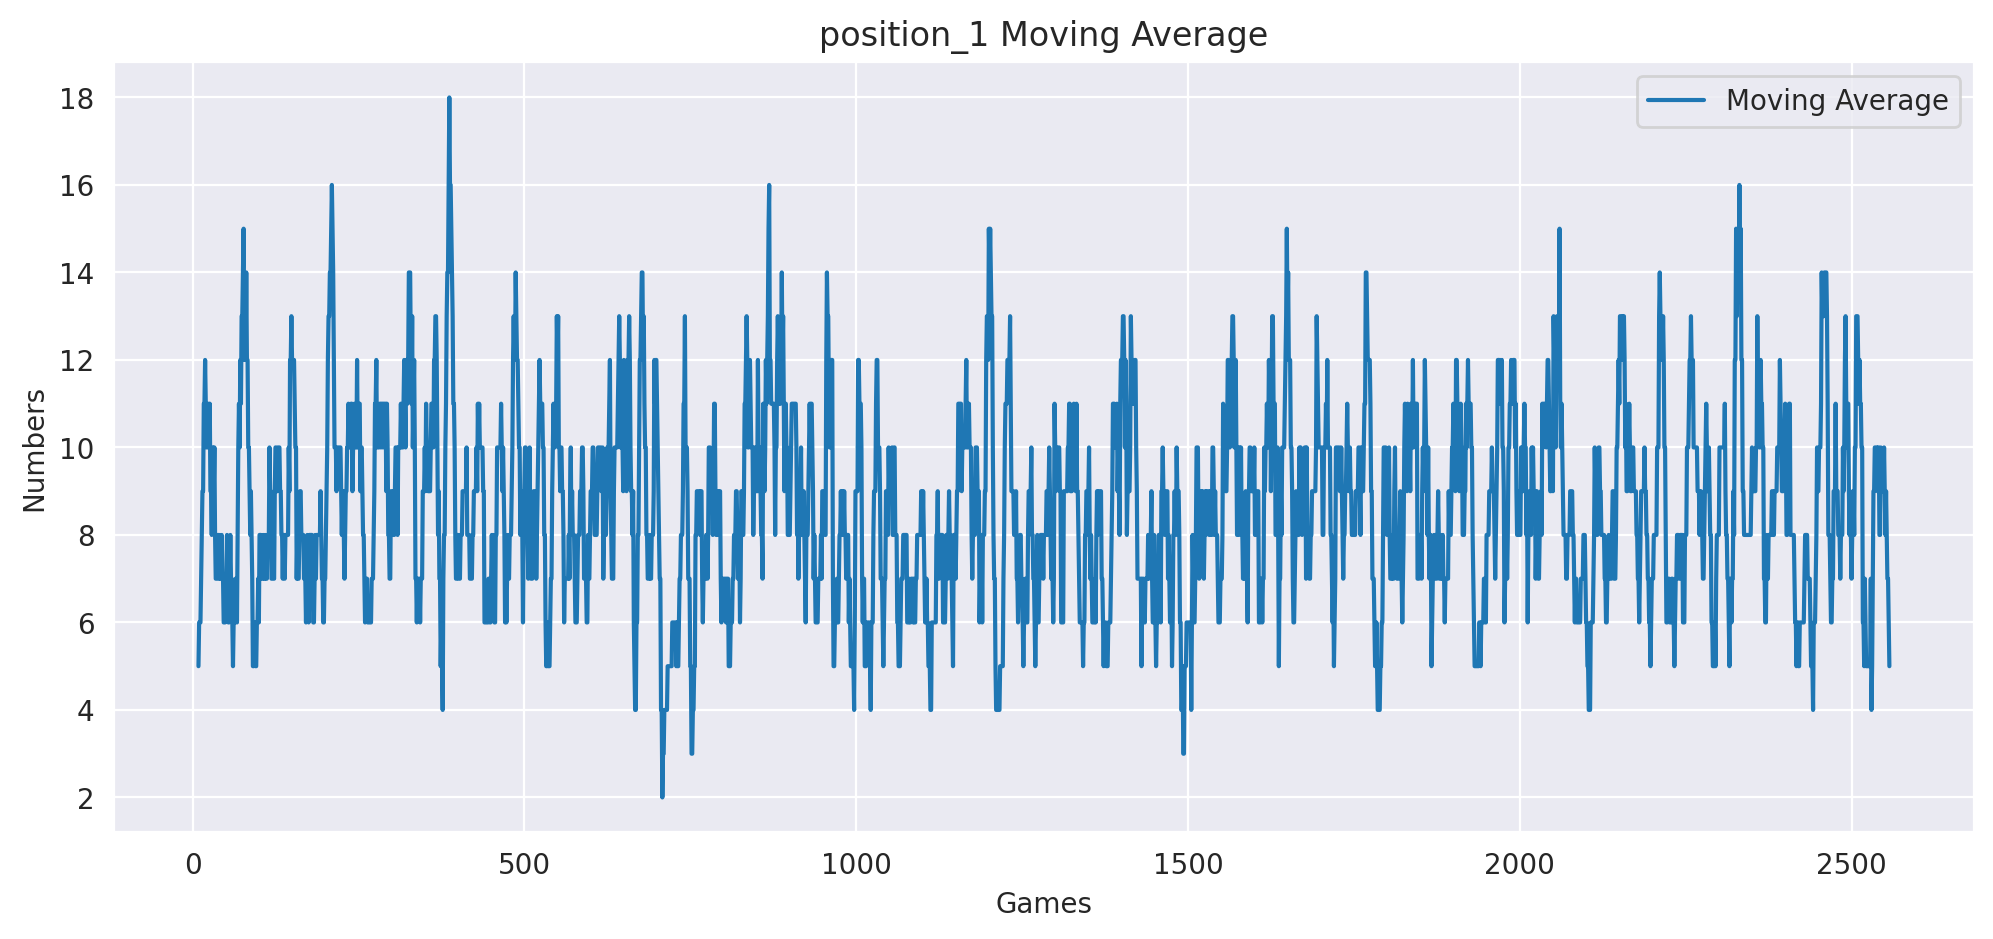

In [15]:
# Define the position to plot
position = 'position_1'

# Extract position data and calculate its moving average
position_data_reverse = games[position].iloc[::-1]
position_data_reverse.index = range(len(position_data_reverse))

window_length = int(10)
position_data_reverse_mean = position_data_reverse.rolling(window_length).mean().round(0)

# Cleaning NaN and reversing
position_data_cleaned = position_data_reverse_mean.dropna()

# Plot the position graph with moving average
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(position_data_cleaned, label='Moving Average')
ax.set_xlabel('Games')
ax.set_ylabel('Numbers')
ax.set_title(position + ' Moving Average')
ax.legend()
plt.show()


## Applying TensorFlow to that position

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

# Vamos dar uma checada no CPU da máquina virtual
!lscpu |grep 'Model name'

# Verifica GPU
!nvidia-smi -L

# Define the position to plot
position = 'position_1'

# Extract position data and calculate its moving average
position_data = games[position]
position_data_reverse = position_data.iloc[::-1]
position_data_reverse.index = range(len(position_data_reverse))

window_length = int(10)
position_data_reverse_mean = position_data_reverse.rolling(window_length).mean()
position_data_cleaned = position_data_reverse_mean.dropna()

# Convert position_data_cleaned to a NumPy array
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

data = position_data_cleaned
WINDOW_SIZE = 5

# Convert the data to the X and y format suitable for LSTM training
X1, y1 = df_to_X_y(data, window_size=WINDOW_SIZE)

print(X1.shape, y1.shape)

# Split data into training and testing sets
train_size = int(len(X1) * 0.6)
val_size = int(len(X1) * 0.2) + train_size

X_train1, y_train1 = X1[:train_size], y1[:train_size]

X_val1, y_val1 = X1[train_size:val_size], y1[train_size:val_size]
X_test1, y_test1 = X1[val_size:], y1[val_size:]

print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

Model name:                      AMD EPYC 7B12
/bin/bash: nvidia-smi: command not found
(2544, 5, 1) (2544,)
(1526, 5, 1) (1526,) (508, 5, 1) (508,) (510, 5, 1) (510,)


## Training model

In [17]:
def train_model():
  model1 = Sequential()
  model1.add(InputLayer((5, 1)))
  model1.add(LSTM(64))
  model1.add(Dense(8, 'relu'))
  model1.add(Dense(1, 'linear'))

  model1.summary()
  tf.get_logger().setLevel('ERROR')

  cp1 = ModelCheckpoint('model1/', save_best_only=True)
  model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError(), 'accuracy'])

  history1 = model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=150, callbacks=[cp1], verbose=0)

  model1 = load_model('model1/')

  return model1, history1

model1, history1 = train_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


## Plotting Loss and RMSE

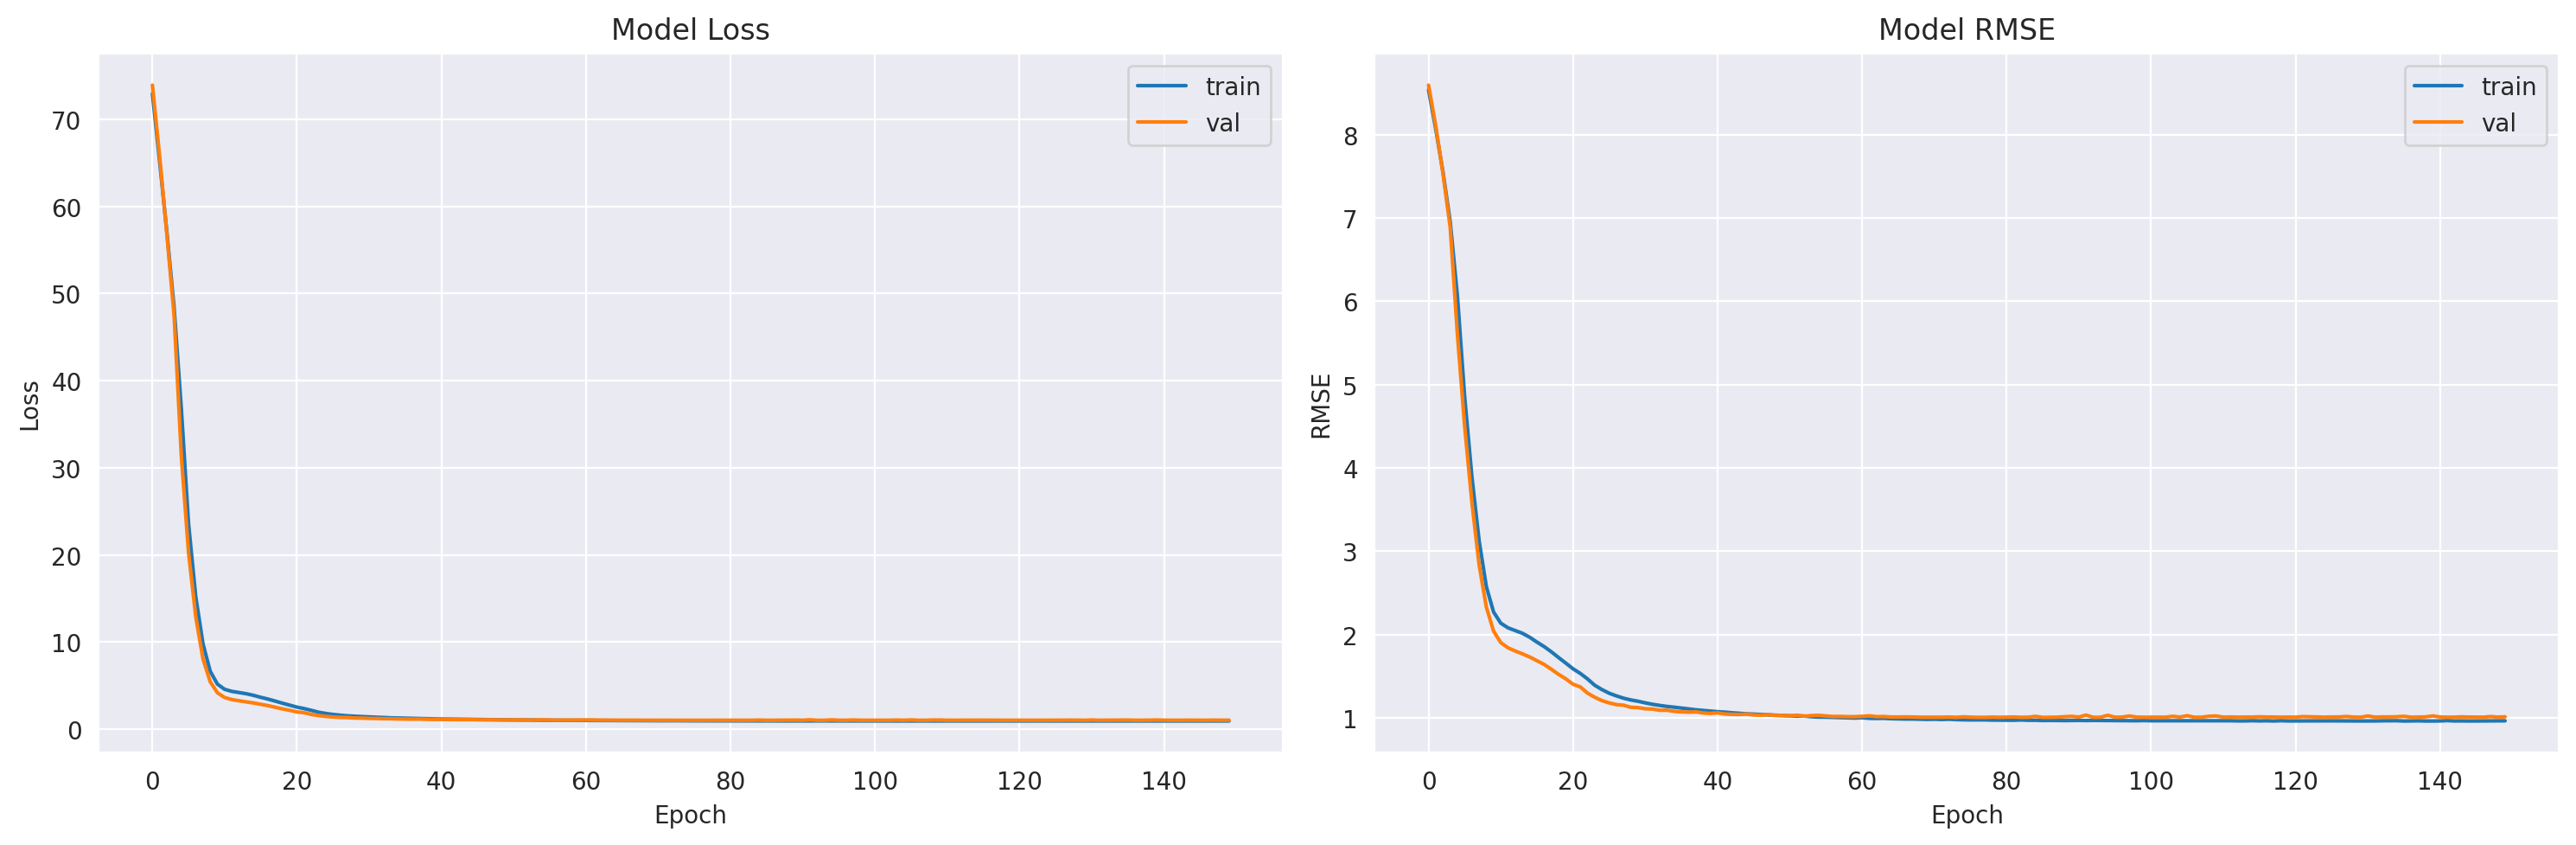

In [18]:
# Plot training and validation loss, RMSE, and accuracy
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(history1.history['loss'])
axs[0].plot(history1.history['val_loss'])
axs[0].set_title('Model Loss')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Epoch')
axs[0].legend(['train', 'val'], loc='upper right')

axs[1].plot(history1.history['root_mean_squared_error'])
axs[1].plot(history1.history['val_root_mean_squared_error'])
axs[1].set_title('Model RMSE')
axs[1].set_ylabel('RMSE')
axs[1].set_xlabel('Epoch')
axs[1].legend(['train', 'val'], loc='upper right')


plt.tight_layout()
plt.show()


## Training Predictions

In [19]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

48/48 [==============================] - 0s 2ms/step


Train Predictions  Actuals
0              7.077930      7.7
1              8.001534      9.0
2              9.323838      9.3
3              9.548337     11.2
4             11.131836     10.9
...                 ...      ...
1521           8.616786      9.0
1522           8.955224      8.0
1523           8.063323      9.9
1524           9.782158      9.6
1525           9.557773      8.9

[1526 rows x 2 columns]

Text(0.5, 1.0, 'Training Predictions vs Actuals')

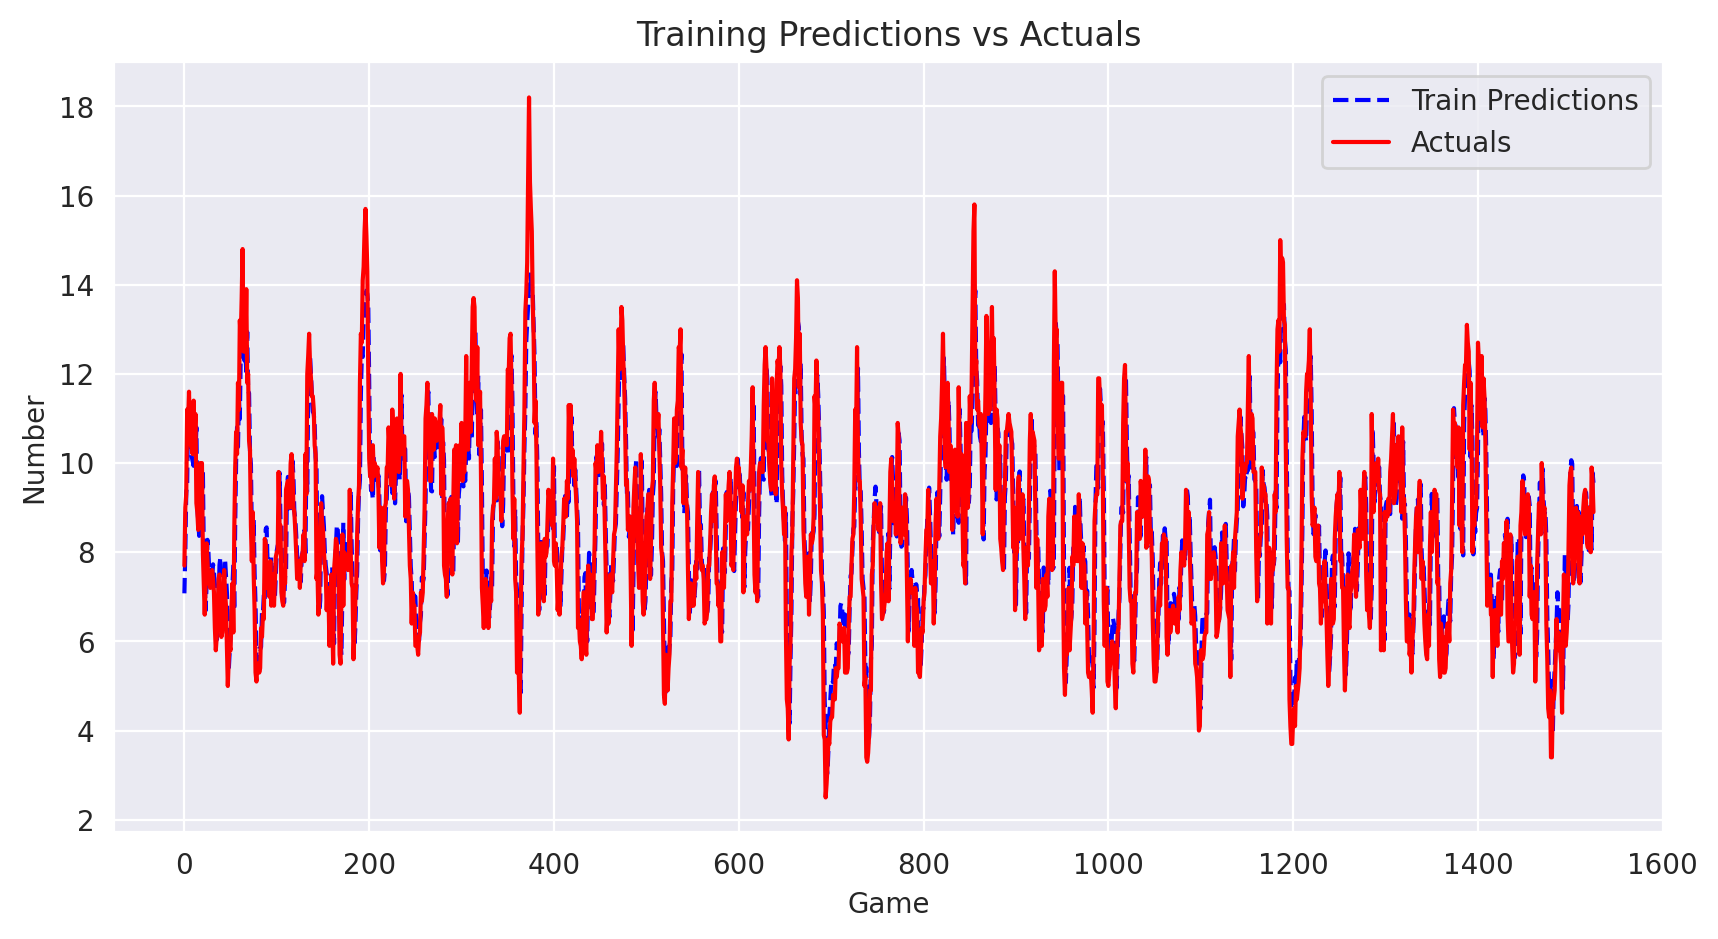

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(train_results['Train Predictions'], color='blue', linestyle='--', label='Train Predictions')
ax.plot(train_results['Actuals'], color='red', linestyle='-', label='Actuals')
ax.legend()
plt.xlabel('Game')
plt.ylabel('Number')
ax.set_title('Training Predictions vs Actuals')


## Validating Predictions

16/16 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Validation Predictions vs Actuals')

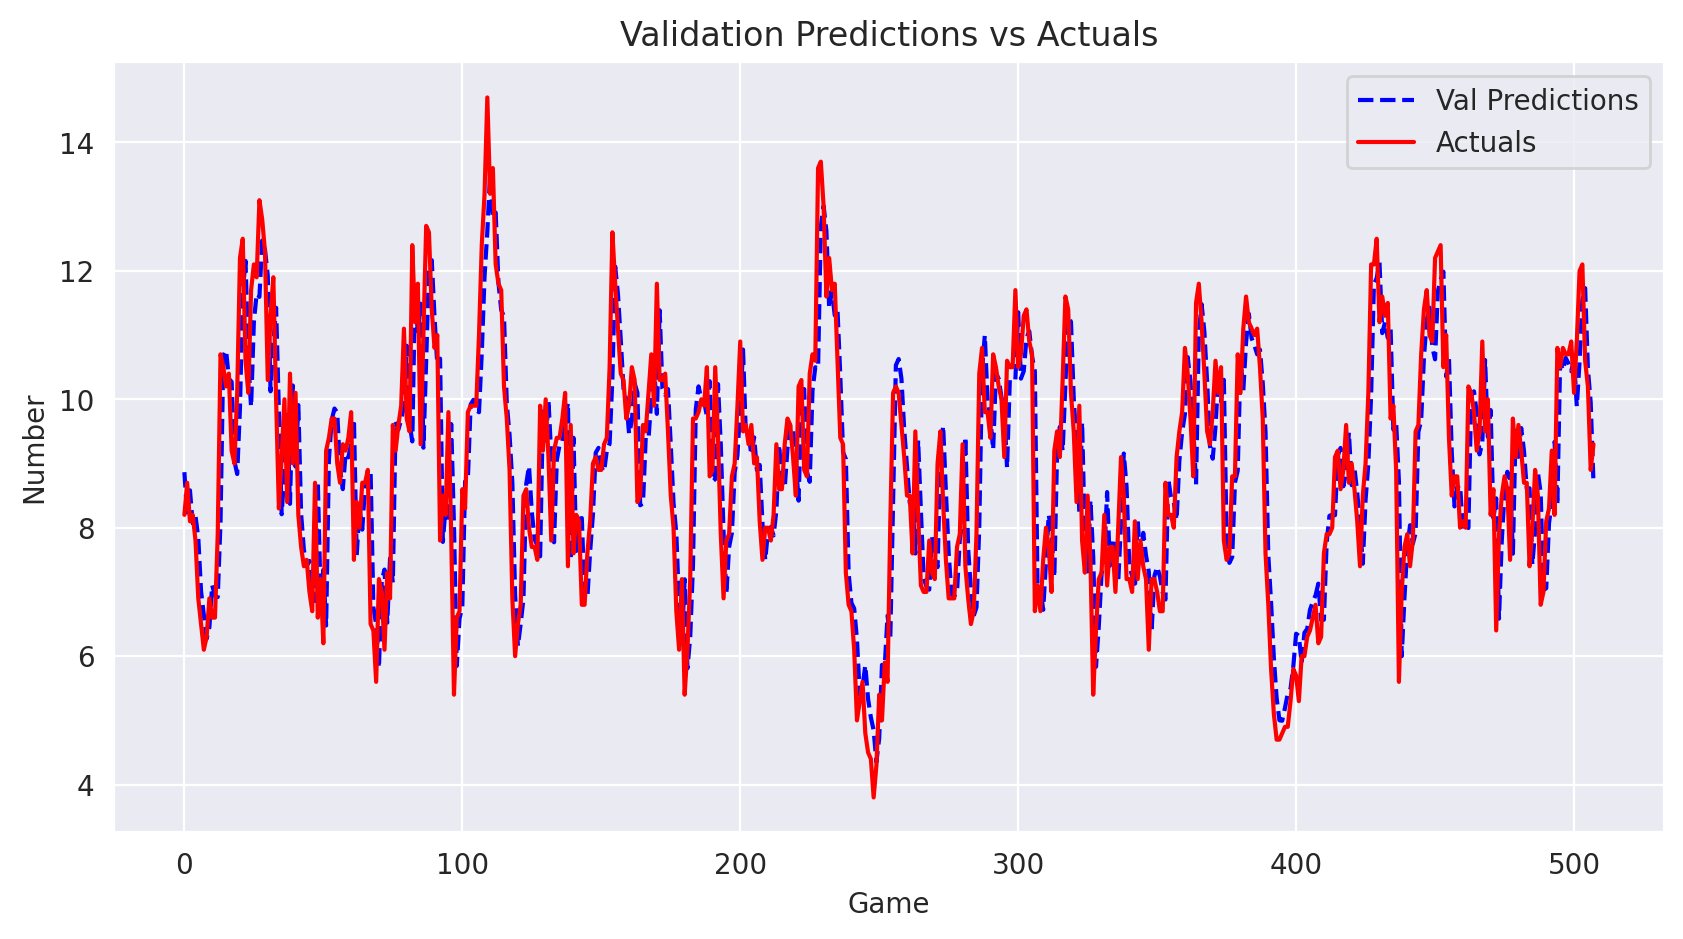

In [21]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(val_results['Val Predictions'], color='blue', linestyle='--', label='Val Predictions')
ax.plot(val_results['Actuals'], color='red', linestyle='-', label='Actuals')
ax.legend()
plt.xlabel('Game')
plt.ylabel('Number')
ax.set_title('Validation Predictions vs Actuals')


## Testing Predictions

16/16 [==============================] - 0s 2ms/step


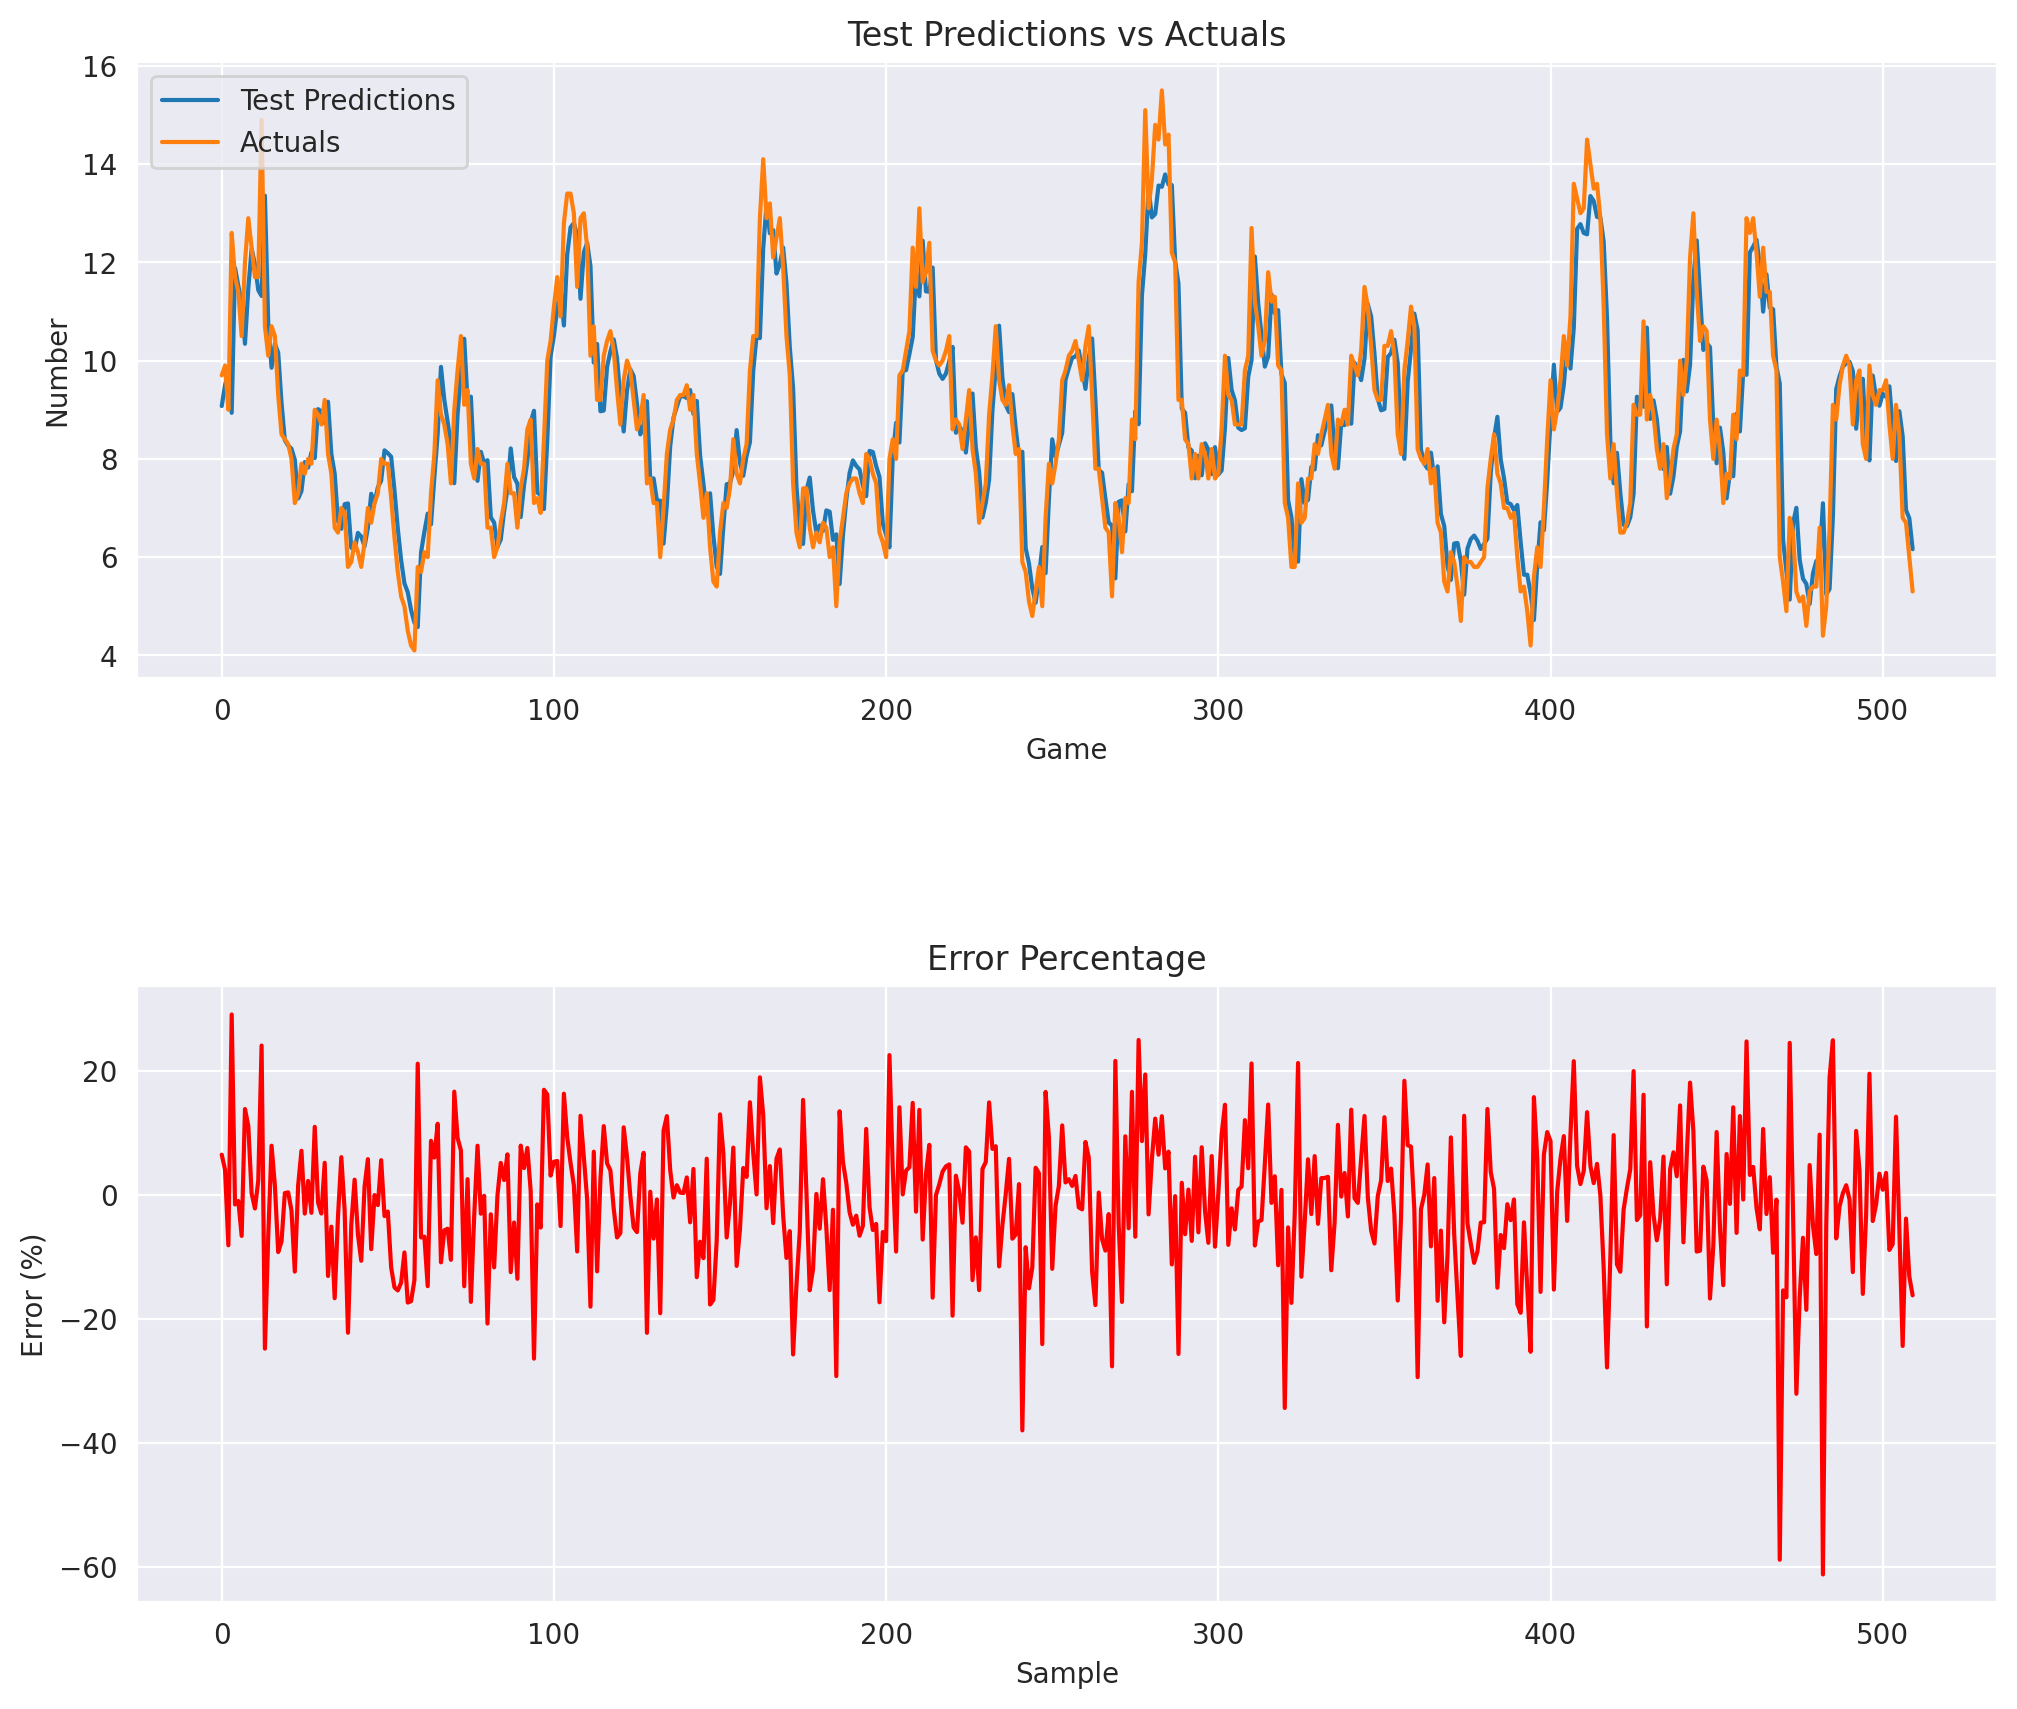

In [22]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test1})

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the actuals and predictions on the first subplot
test_results.plot(ax=axs[0])
axs[0].set_title('Test Predictions vs Actuals')
axs[0].set_xlabel('Game')
axs[0].set_ylabel('Number')
axs[0].legend(loc='upper left')

# Calculate the percentage difference between actuals and predictions
error_pct = ((test_results['Actuals'] - test_results['Test Predictions']) / test_results['Actuals']) * 100

# Plot the error percentage on the second subplot
axs[1].plot(error_pct, color='red')
axs[1].set_title('Error Percentage')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Error (%)')

# Adjust the spacing between the subplots
fig.subplots_adjust(hspace=0.5)

plt.show()


## Predicting New Game based on past results

1/1 [==============================] - 0s 17ms/step


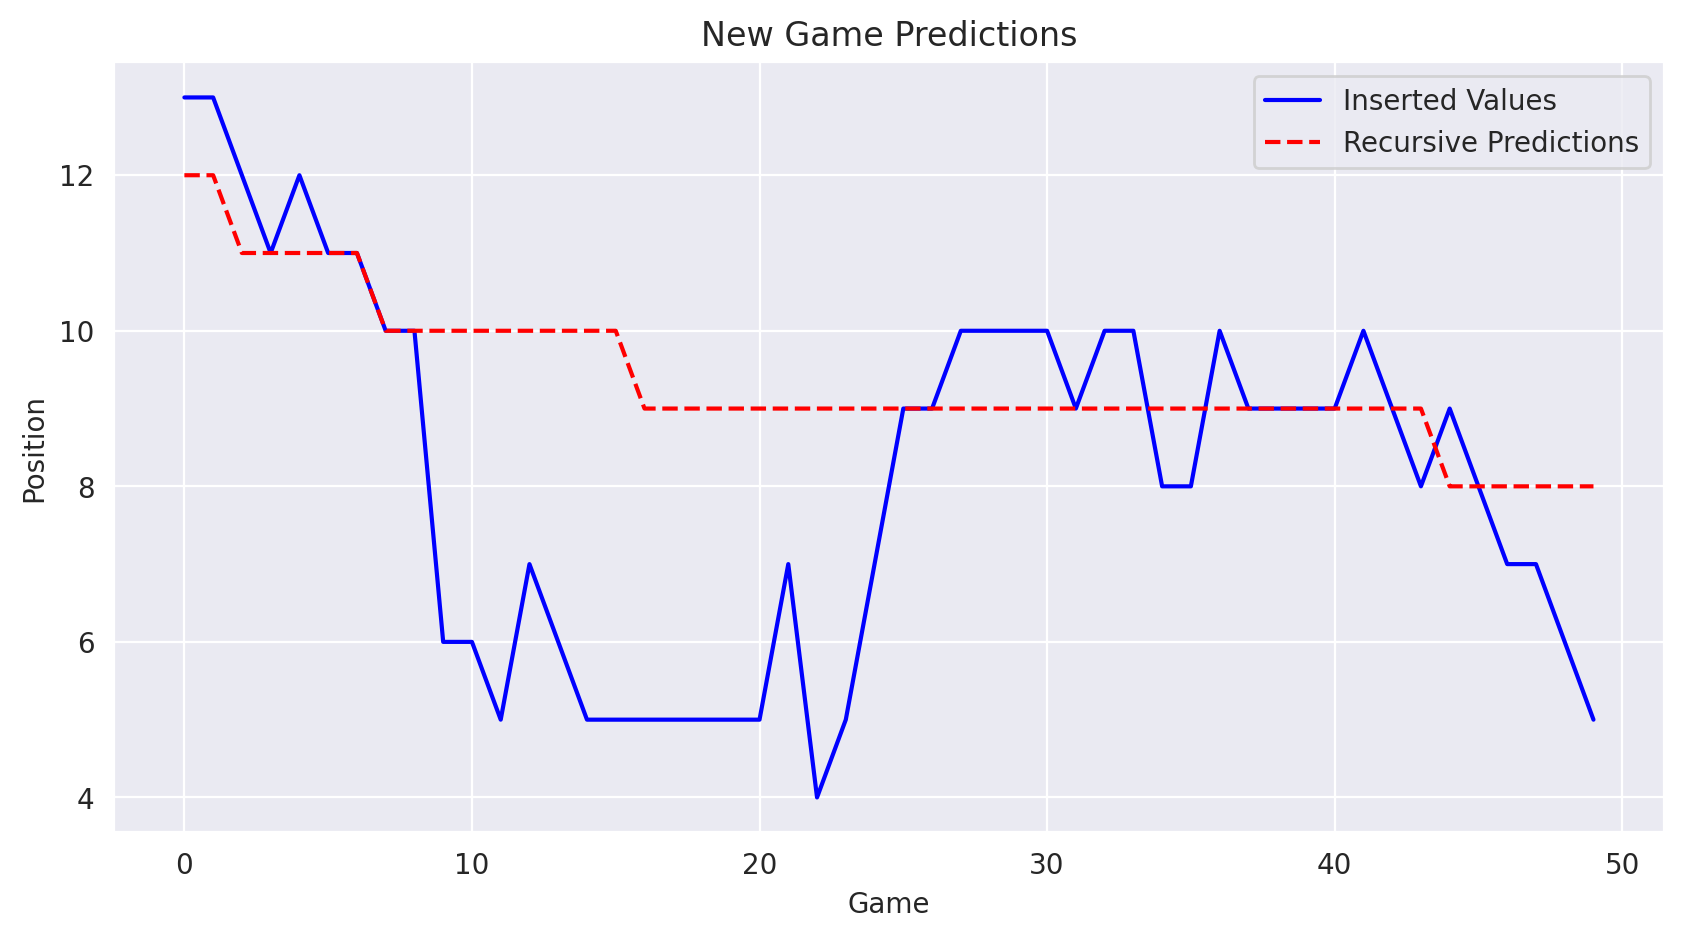

In [90]:
from copy import deepcopy

# Initialize a list to store the predicted values
predictions = []

# Generate predictions recursively
recursive_predictions = []
window_prediction = 50

recursive_numbers = position_data_cleaned.index[-window_prediction:]
last_window  = deepcopy(X_test1[-window_prediction])

for target_number in recursive_numbers:
    next_prediction = model1.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction

# Normalize the actual values
actual_values = position_data_cleaned[-window_prediction:].values.flatten()

# Plot the predicted and actual values
rounded_predictions = [np.round(prediction) for prediction in recursive_predictions]

plt.figure(figsize=(10, 5))
plt.plot(actual_values.round(0), color='blue', linestyle='-')
plt.plot(rounded_predictions, color='red', linestyle='--')
plt.title('New Game Predictions')
plt.xlabel('Game')
plt.ylabel('Position')
plt.legend(['Inserted Values', 'Recursive Predictions'])
plt.show()
